In [1]:
import os
import sys
import glob
import math
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.examples.tutorials.mnist import input_data
from scipy.interpolate import make_interp_spline,BSpline
from IPython.display import Image, display_png
# dataset pipeline in train
from train_debug import input_fn, make_copy_rotate_image
from train_debug import  rotate_operation

In [2]:
mnist = input_data.read_data_sets(os.path.abspath("./MNIST_data/"), one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
def resize_fn(img, height=32, width=32):
    return tf.image.resize_images(img, (height, width))

In [4]:
def load_model(model_dir, epoch, mtype):
    print(" Load {} at {} epoch".format(mtype, epoch))
    model_def = model_dir+'/'+mtype+'.json'
    model_weight = model_dir+'/'+mtype+'-'+str(epoch)+'.h5'
    with open(model_def, "r") as f:
        model = tf.keras.models.model_from_json(f.read())
    model.load_weights(model_weight)
    return model

#### Data pipeline

In [5]:
# data
x_test = mnist.test.images
x_test = x_test.reshape(-1, 28,28,1)
# labels
y_test = mnist.test.labels

# resize
imgs_tf = resize_fn(x_test, height=32, width=32)
# tf2np
test_imgs = tf.keras.backend.eval(imgs_tf)

### Compare reconstructed images in each digit-class

In [8]:
expname = '62516846'
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=24, mtype='encoder')
decoder = load_model(model_dir, epoch=24, mtype='decoder')

 Load encoder at 24 epoch
 Load decoder at 24 epoch


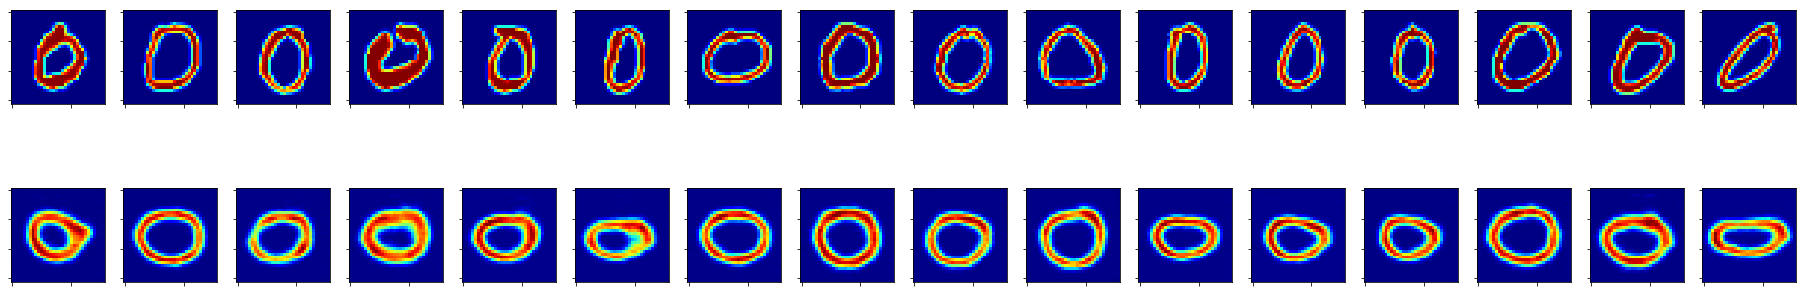

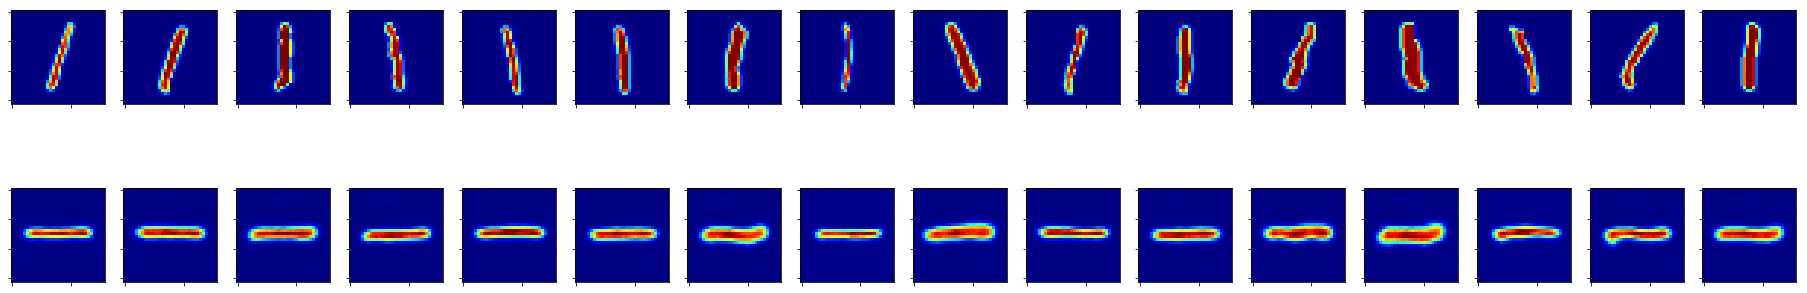

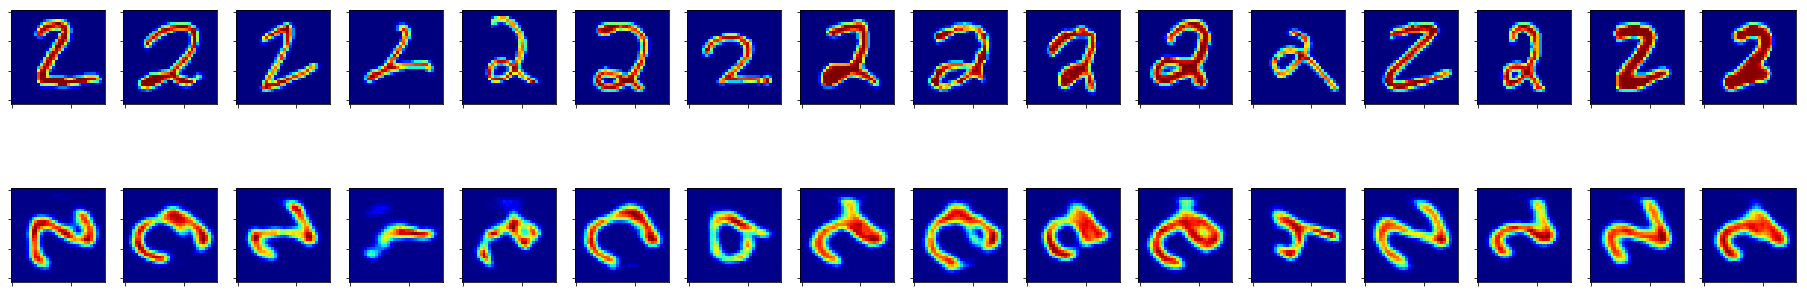

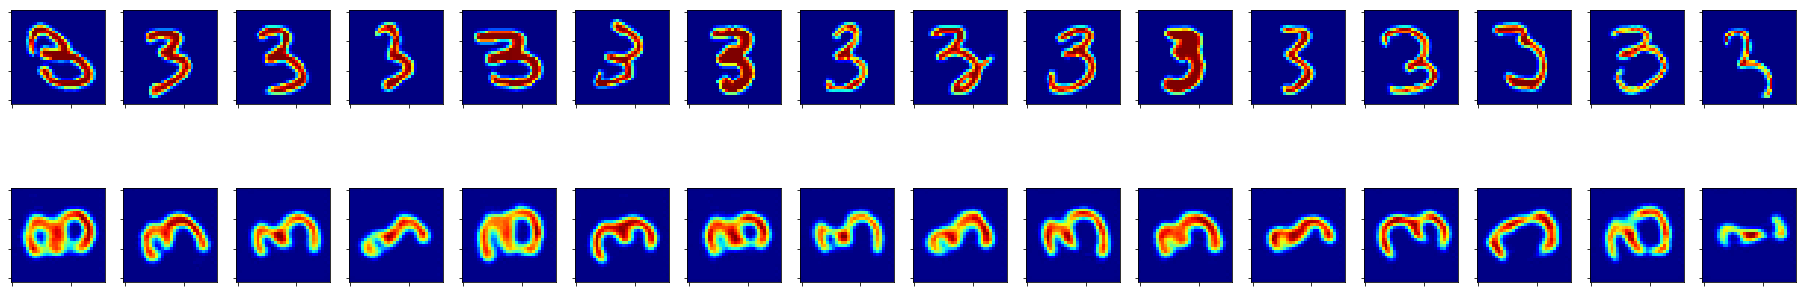

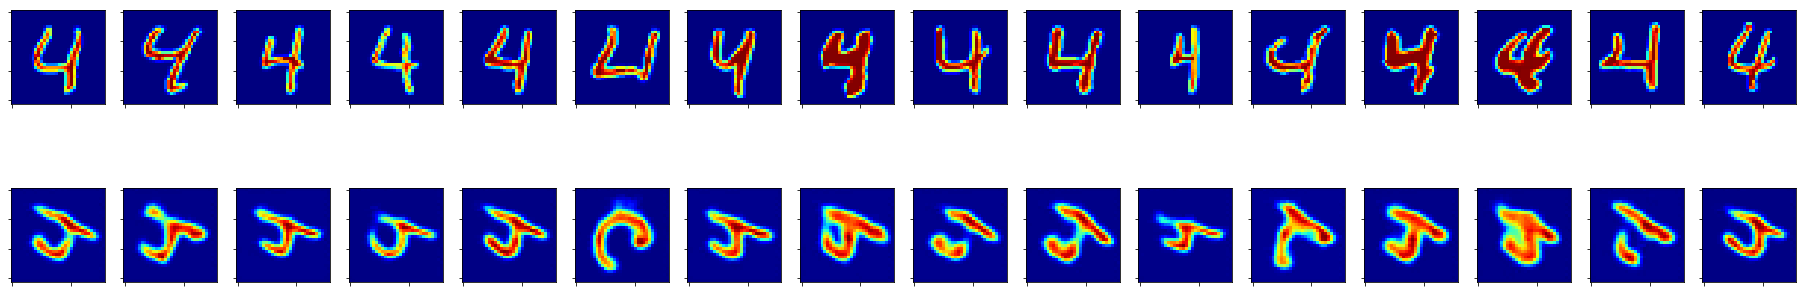

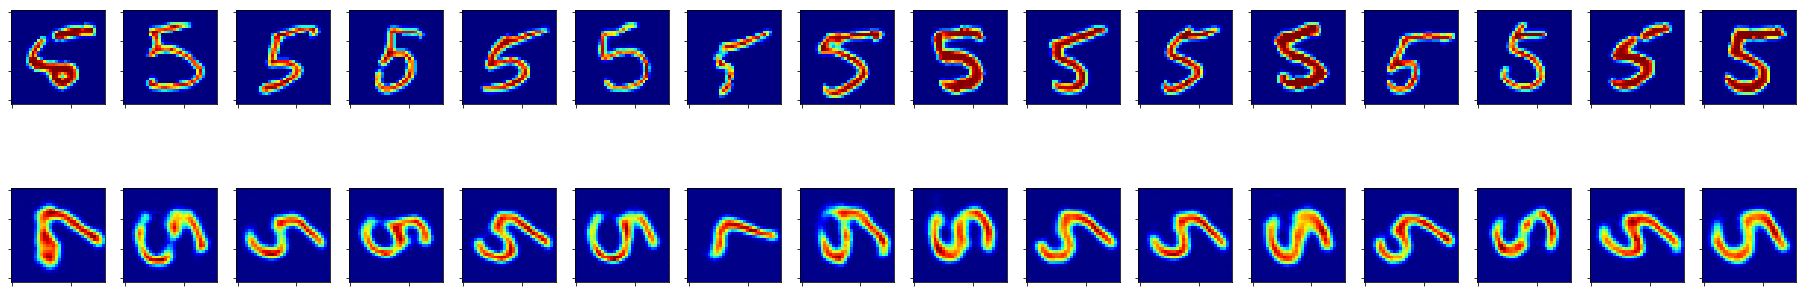

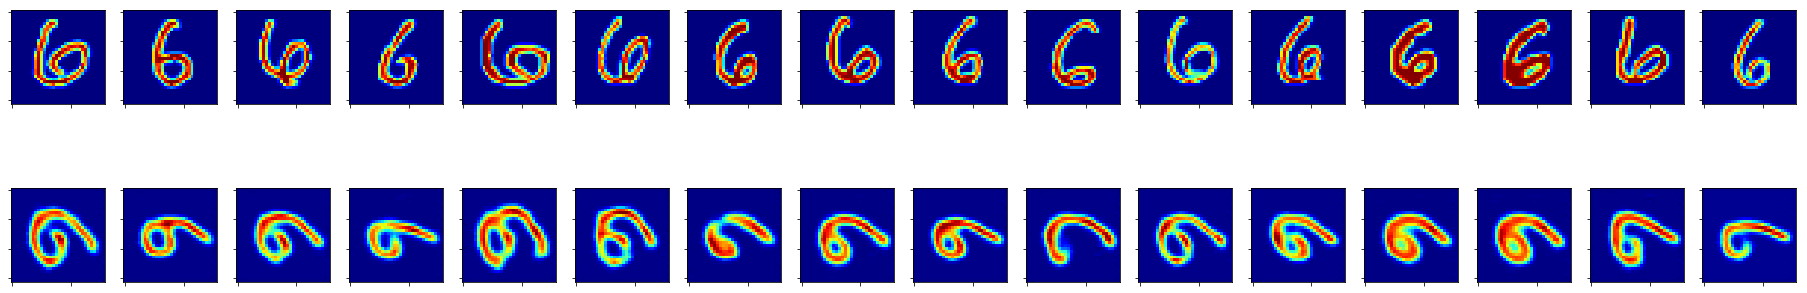

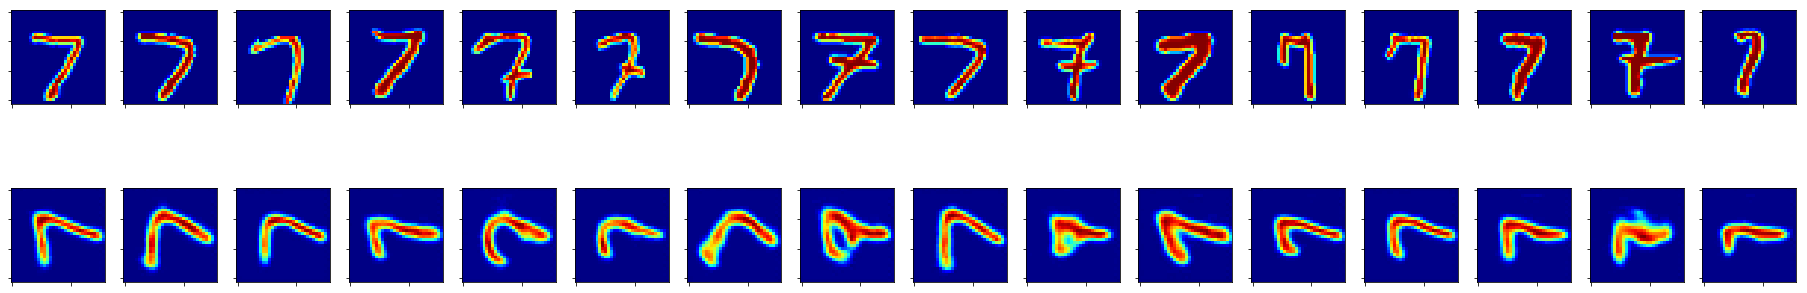

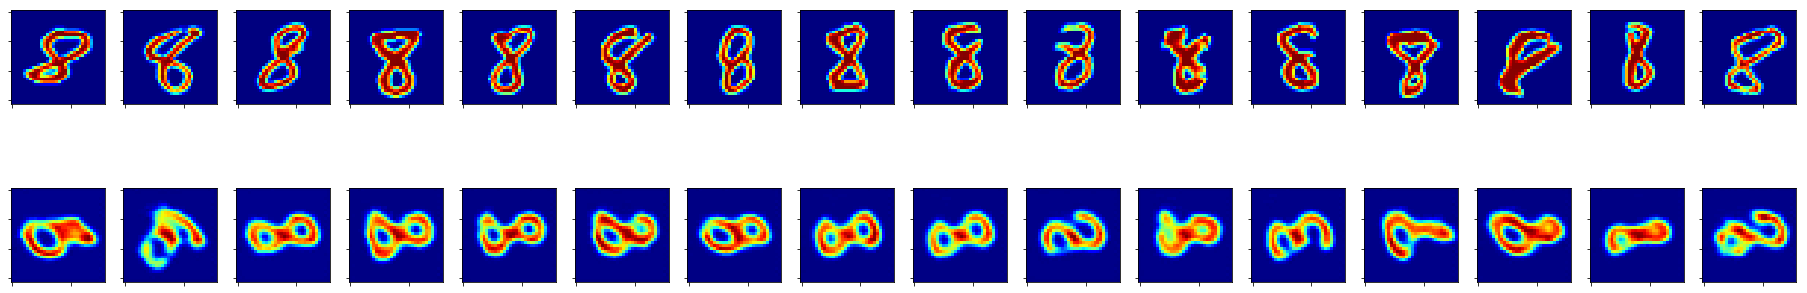

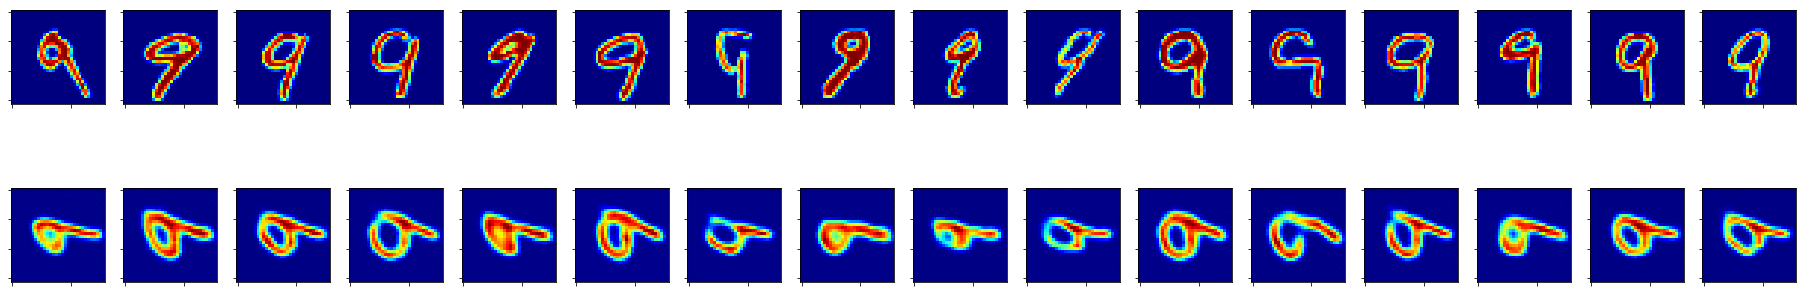

In [13]:
for digit in range(10):
    imgs = test_imgs[np.where(y_test == digit)][:16]
    
    encoded_imgs = encoder.predict(imgs)
    results = decoder.predict(encoded_imgs)
        
    height, width = 32,32
    num_test_images = 16
    f,a=plt.subplots(2,num_test_images,figsize=(2*num_test_images,6))
    for idx, i in enumerate(range(num_test_images)):
        a[0][idx].imshow(np.reshape(imgs[i],(height,width)), cmap='jet')
        #a[1][idx].imshow(np.reshape(rtest_imgs[iteration*16+i],(height,width)), cmap='jet')
        a[1][idx].imshow(np.reshape(results[i],(height,width)), cmap='jet')
            
        for ii in range(2):
            # set axis turn off
            a[ii][idx].set_xticklabels([])
            a[ii][idx].set_yticklabels([])
    plt.show()

### 62533001: Load model trained until 50 epochs after 62516846

In [49]:
expname = '62533001'
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=24, mtype='encoder')
decoder = load_model(model_dir, epoch=24, mtype='decoder')

 Load encoder at 24 epoch
 Load decoder at 24 epoch


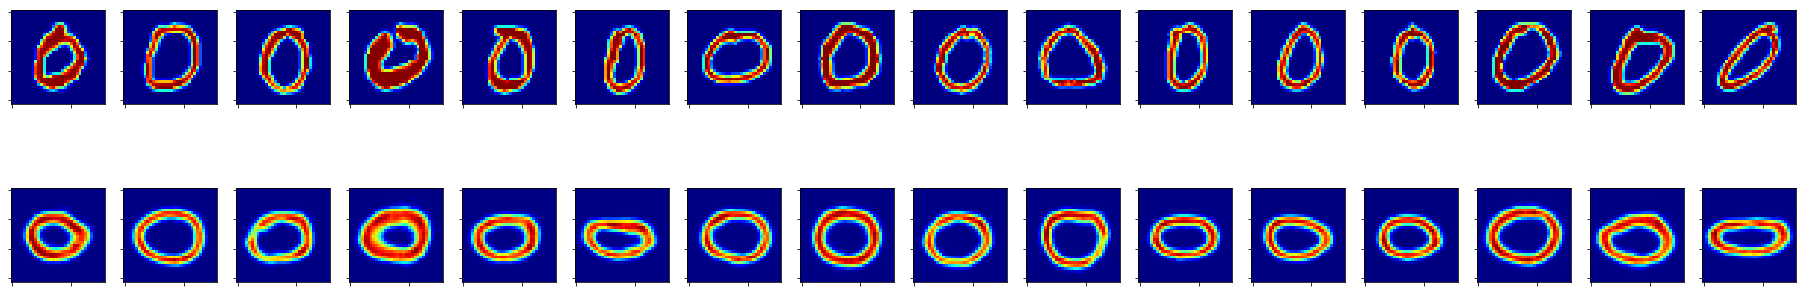

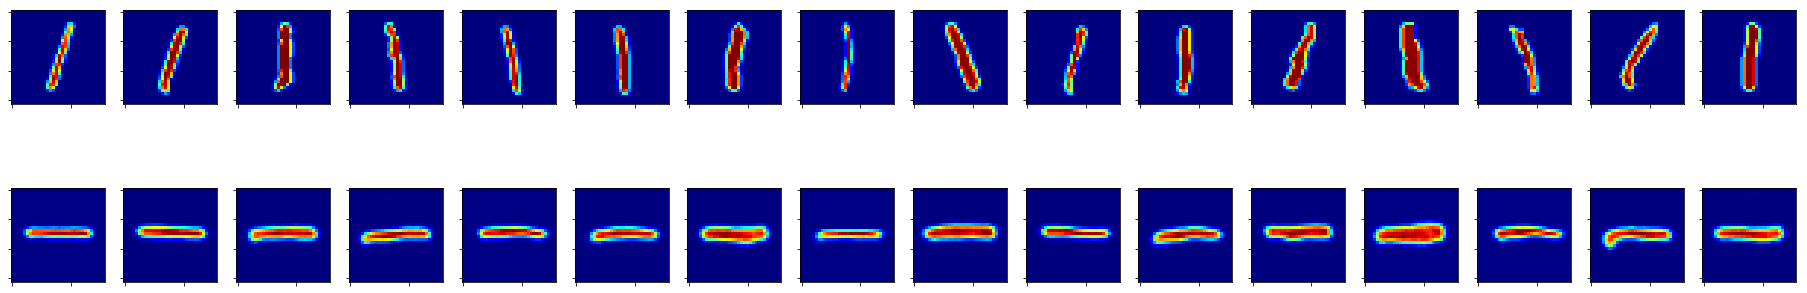

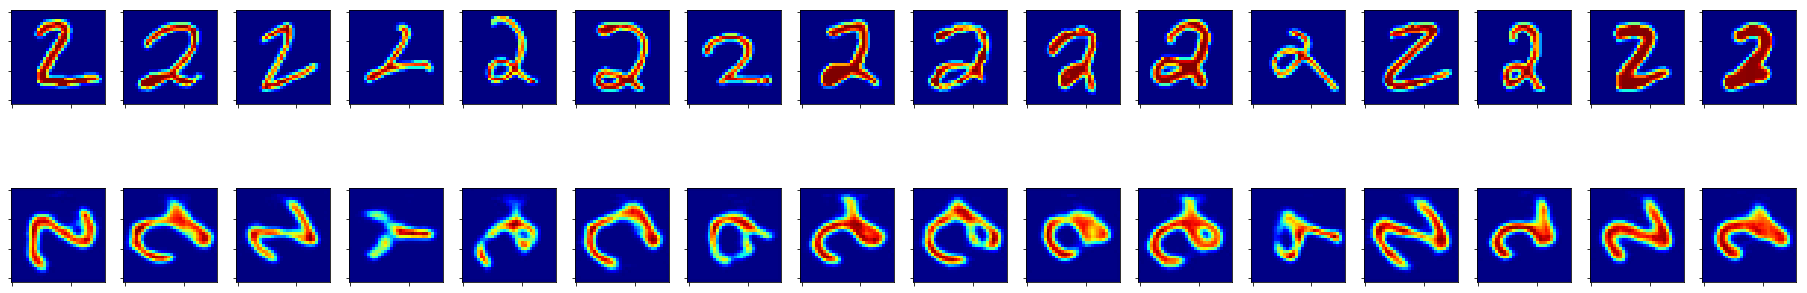

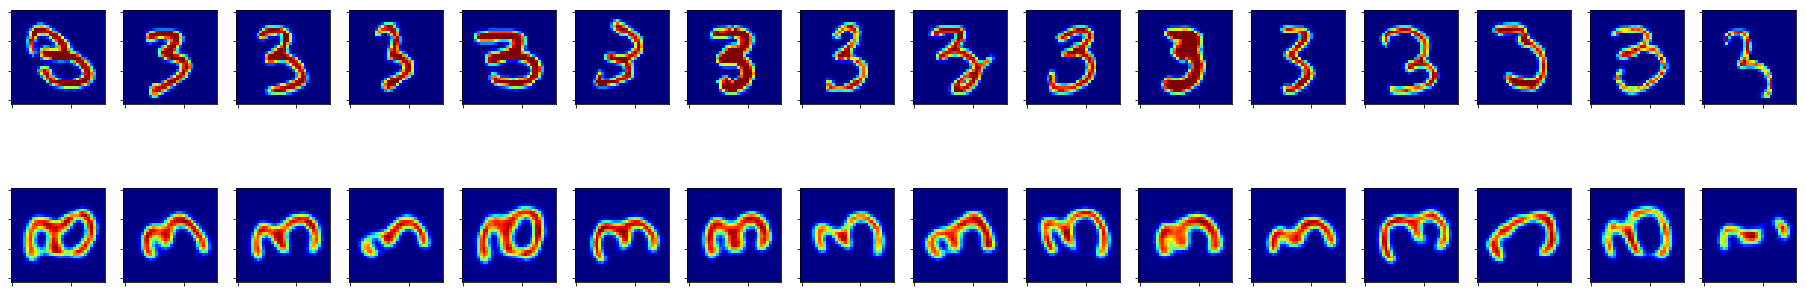

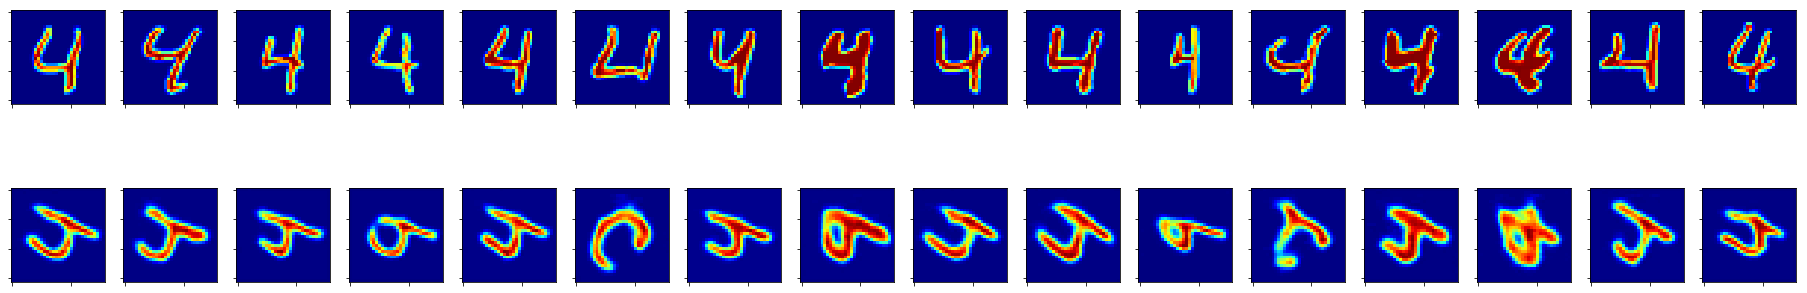

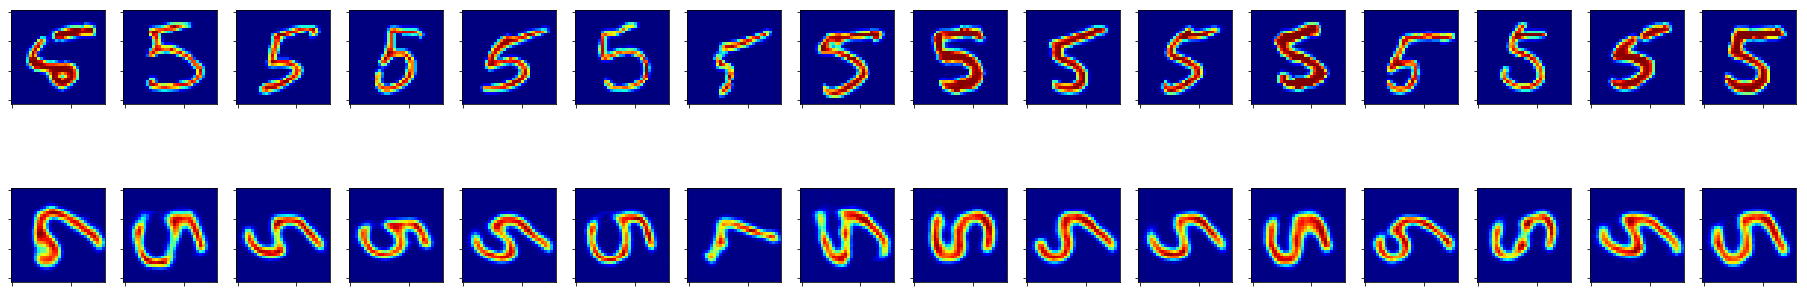

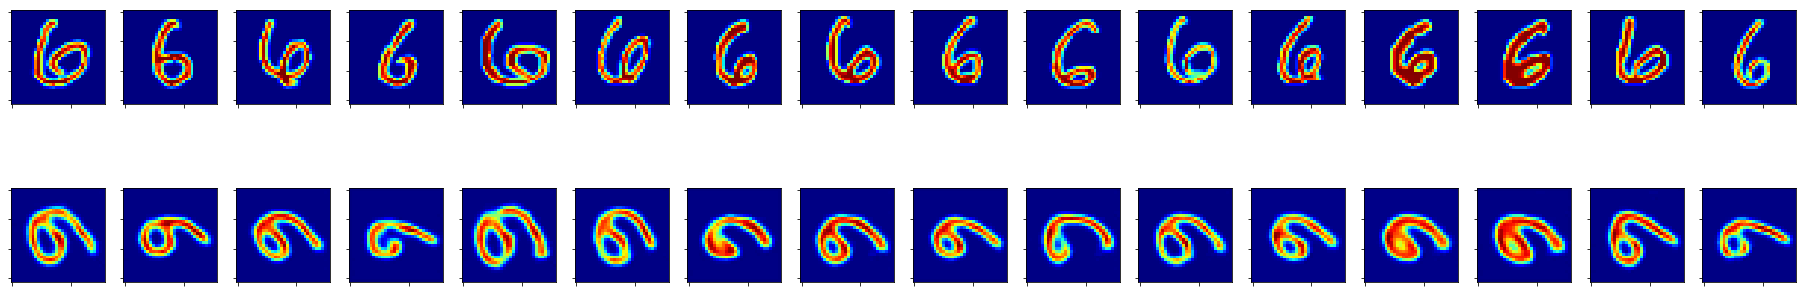

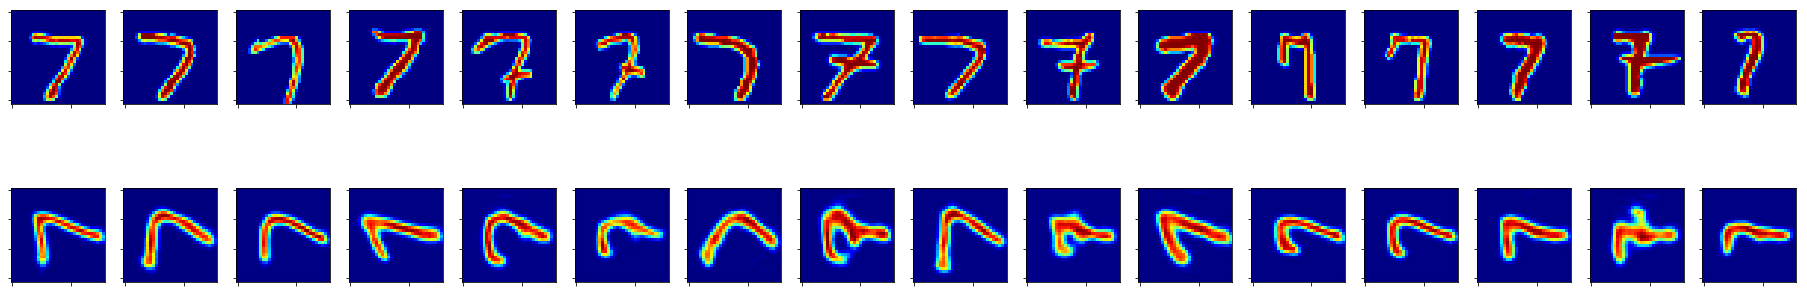

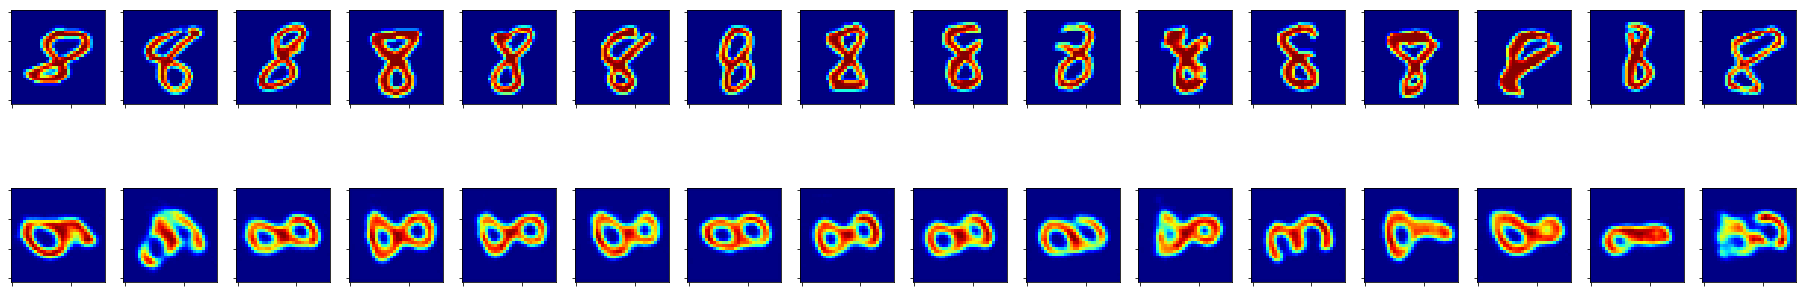

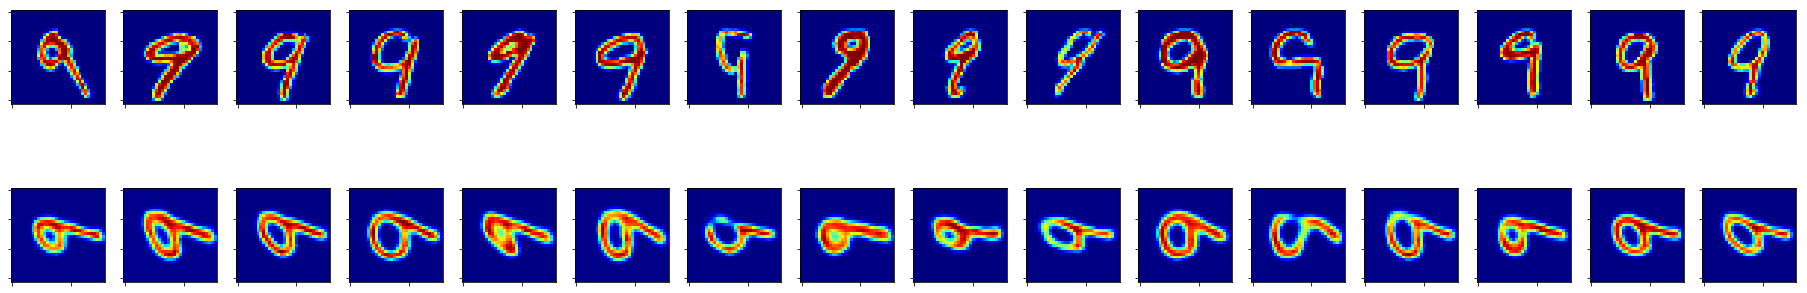

In [50]:
for digit in range(10):
    imgs = test_imgs[np.where(y_test == digit)][:16]
    
    encoded_imgs = encoder.predict(imgs)
    results = decoder.predict(encoded_imgs)
        
    height, width = 32,32
    num_test_images = 16
    f,a=plt.subplots(2,num_test_images,figsize=(2*num_test_images,6))
    for idx, i in enumerate(range(num_test_images)):
        a[0][idx].imshow(np.reshape(imgs[i],(height,width)), cmap='jet')
        #a[1][idx].imshow(np.reshape(rtest_imgs[iteration*16+i],(height,width)), cmap='jet')
        a[1][idx].imshow(np.reshape(results[i],(height,width)), cmap='jet')
            
        for ii in range(2):
            # set axis turn off
            a[ii][idx].set_xticklabels([])
            a[ii][idx].set_yticklabels([])
    plt.show()

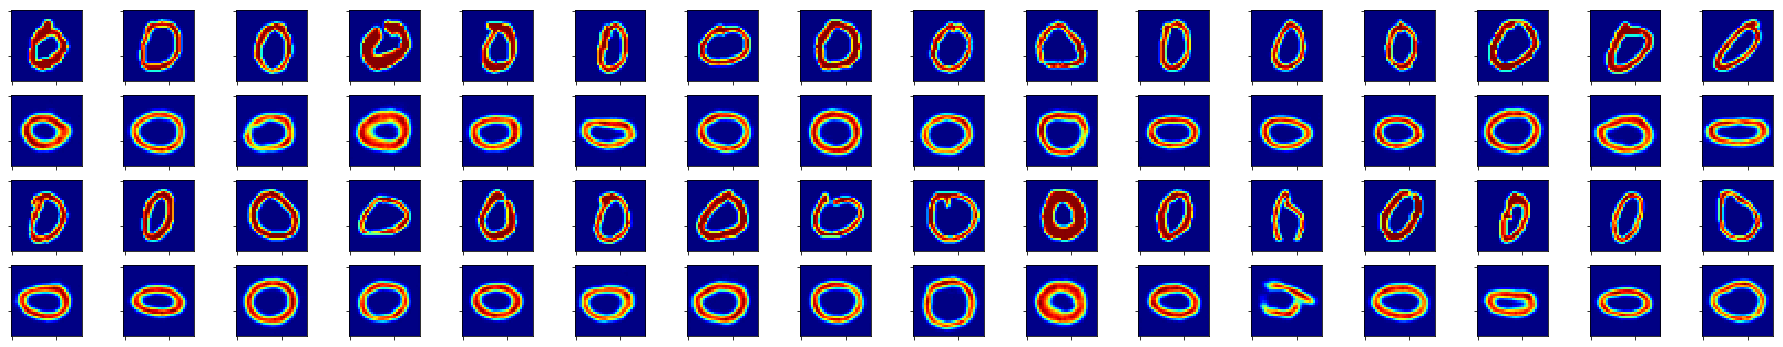

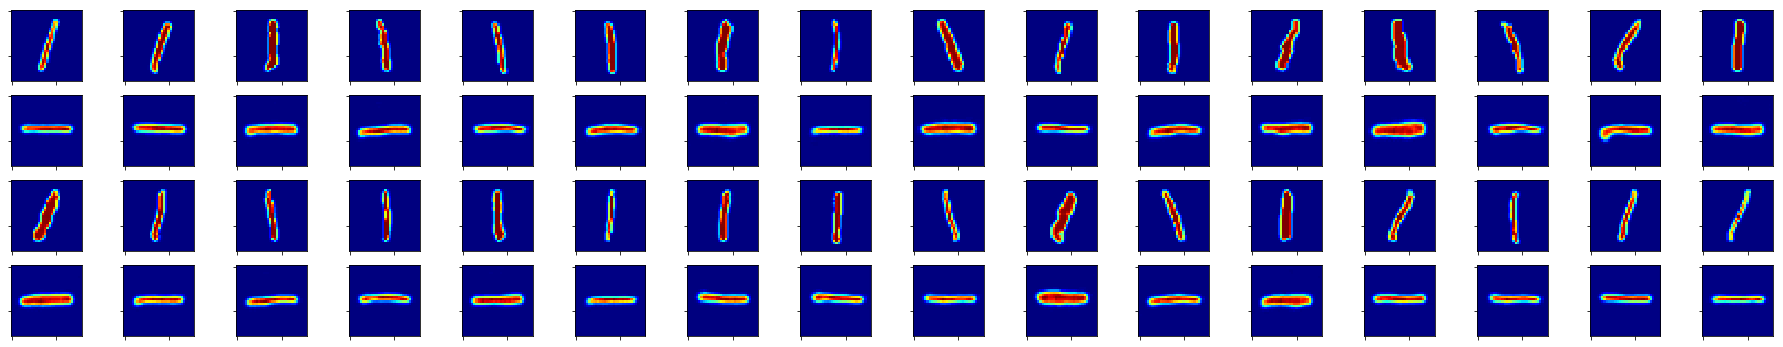

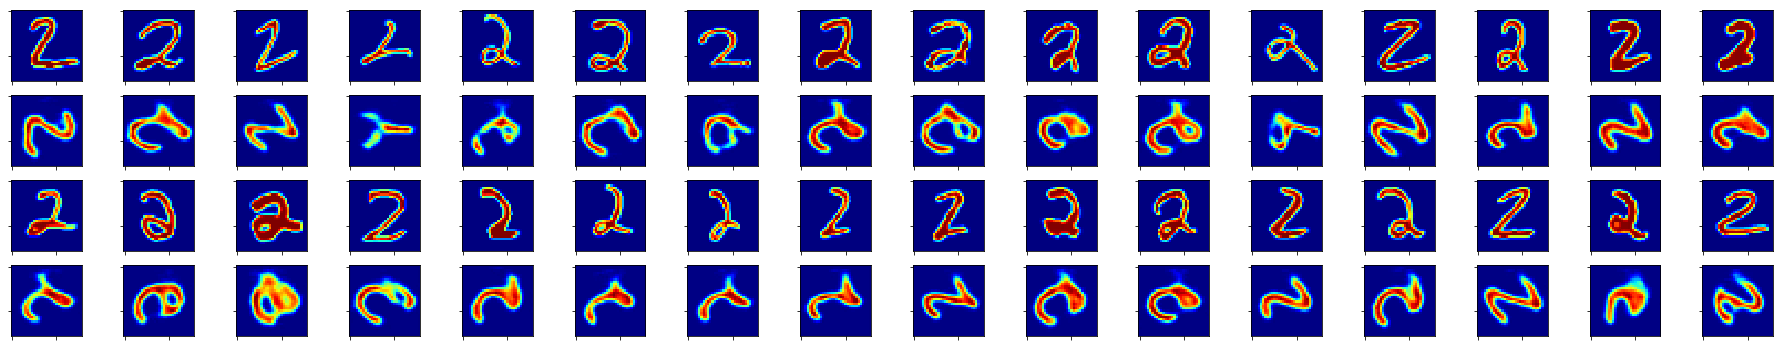

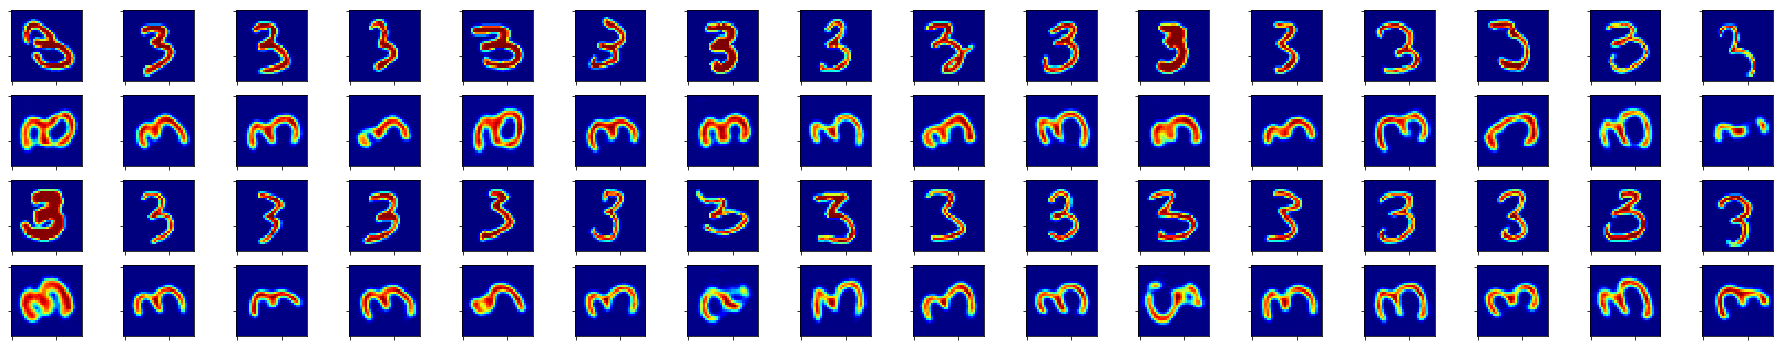

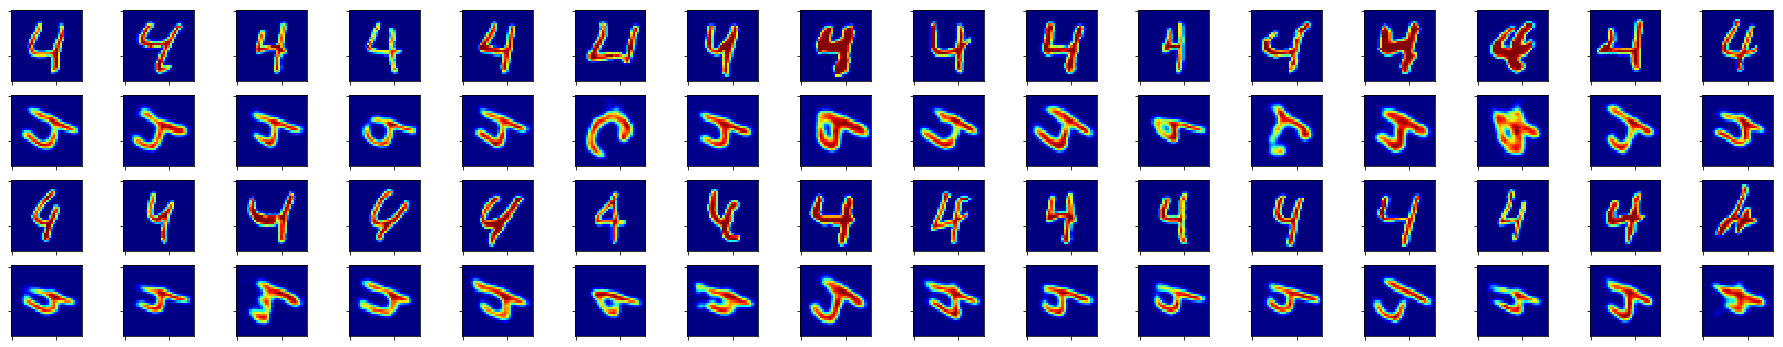

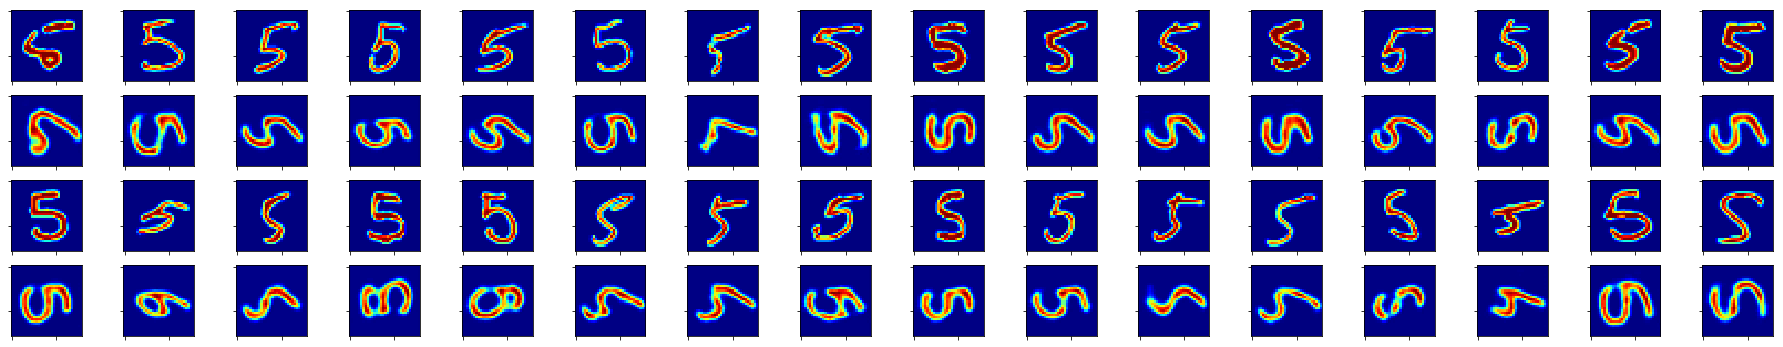

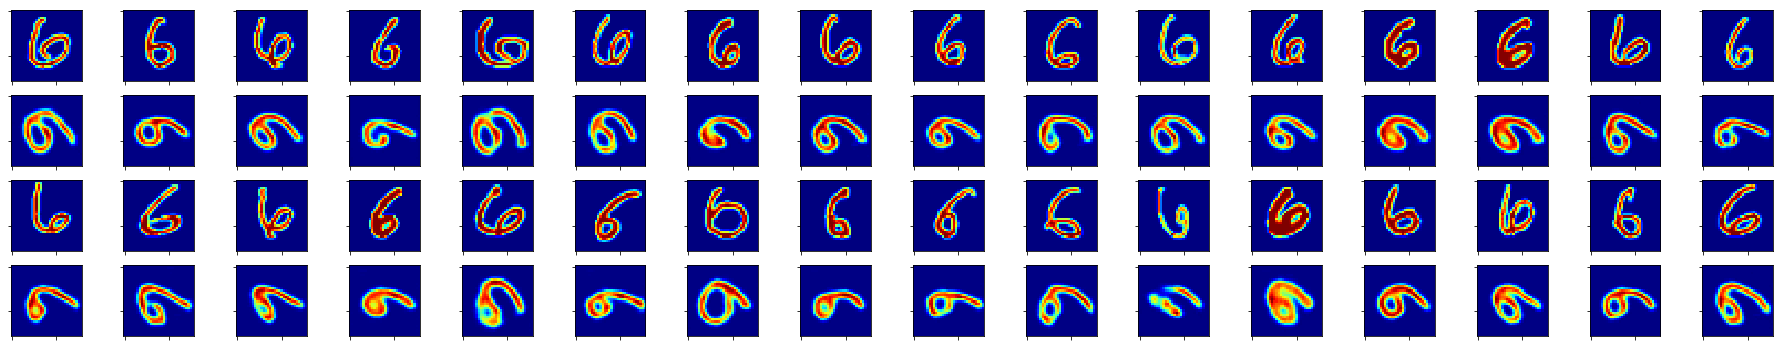

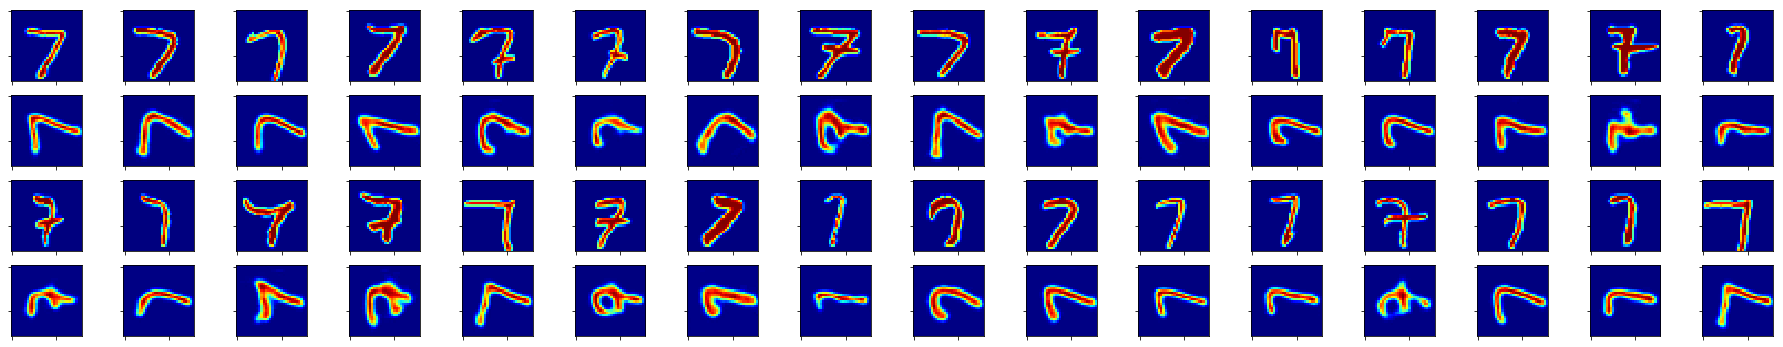

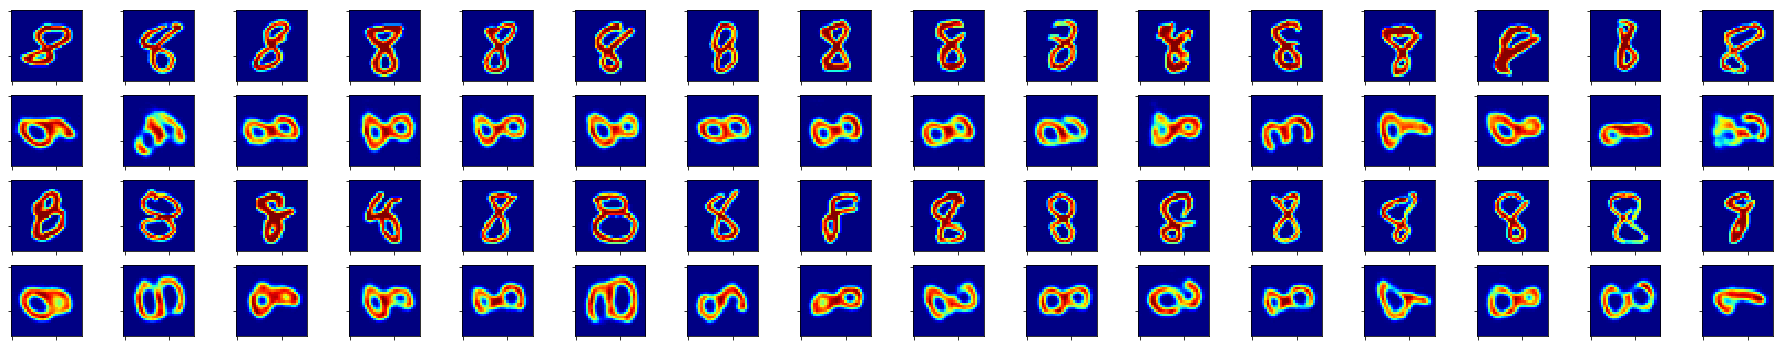

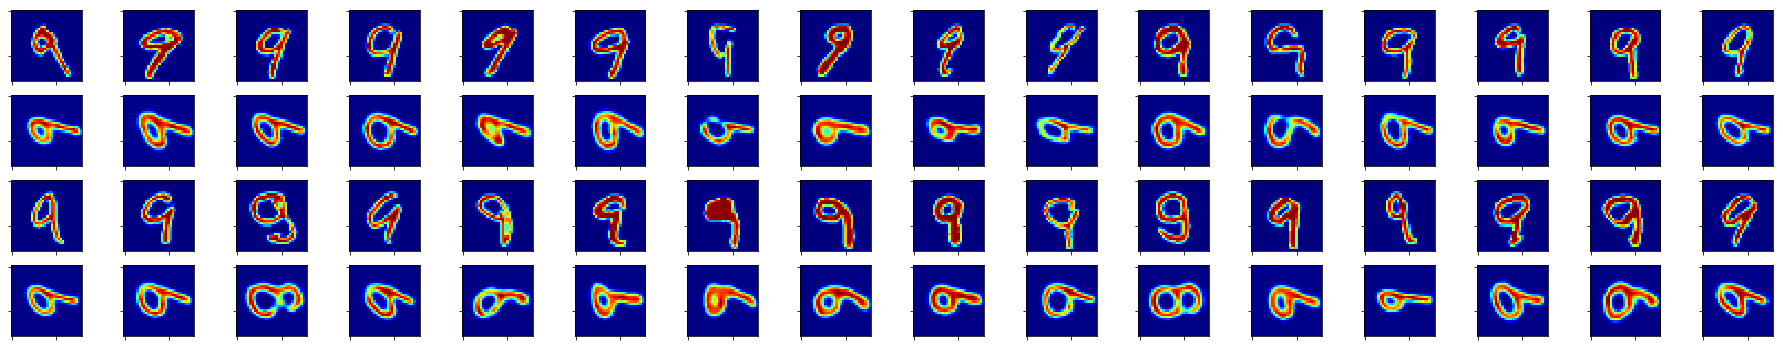

In [53]:
for digit in range(10):
    imgs = test_imgs[np.where(y_test == digit)][:32]
    
    encoded_imgs = encoder.predict(imgs)
    results = decoder.predict(encoded_imgs)
        
    height, width = 32,32
    num_test_images = 16
    f,a=plt.subplots(4,num_test_images,figsize=(2*num_test_images,6))
    for idx, i in enumerate(range(num_test_images)):
        a[0][idx].imshow(np.reshape(imgs[i],(height,width)), cmap='jet')
        #a[1][idx].imshow(np.reshape(rtest_imgs[iteration*16+i],(height,width)), cmap='jet')
        a[1][idx].imshow(np.reshape(results[i],(height,width)), cmap='jet')
        a[2][idx].imshow(np.reshape(imgs[i+16],(height,width)), cmap='jet')
        #a[1][idx].imshow(np.reshape(rtest_imgs[iteration*16+i],(height,width)), cmap='jet')
        a[3][idx].imshow(np.reshape(results[i+16],(height,width)), cmap='jet')
            
        for ii in range(4):
            # set axis turn off
            a[ii][idx].set_xticklabels([])
            a[ii][idx].set_yticklabels([])
    plt.show()

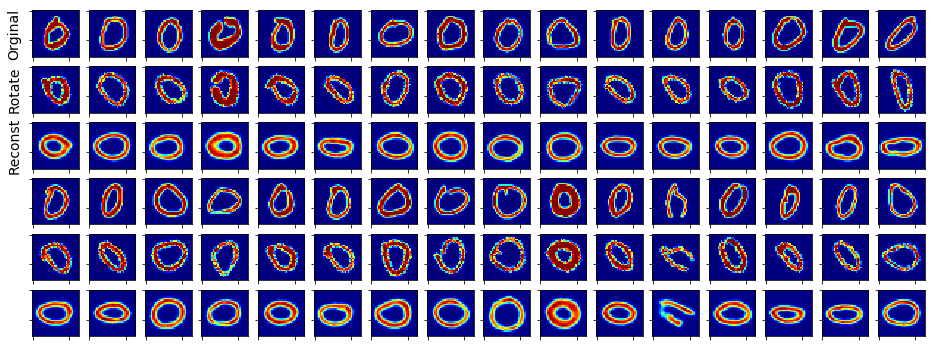

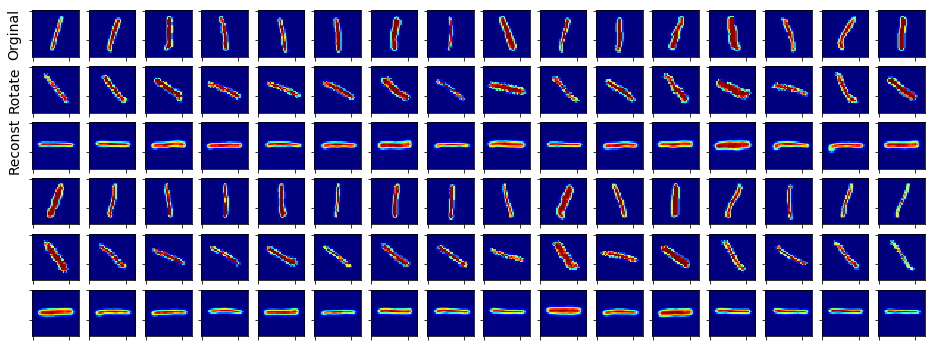

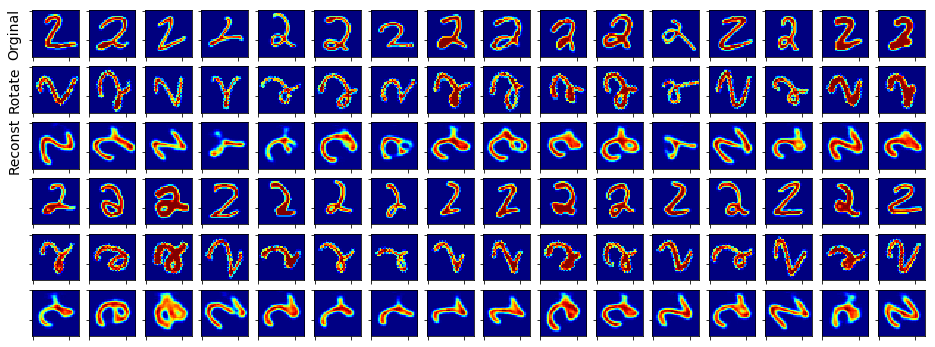

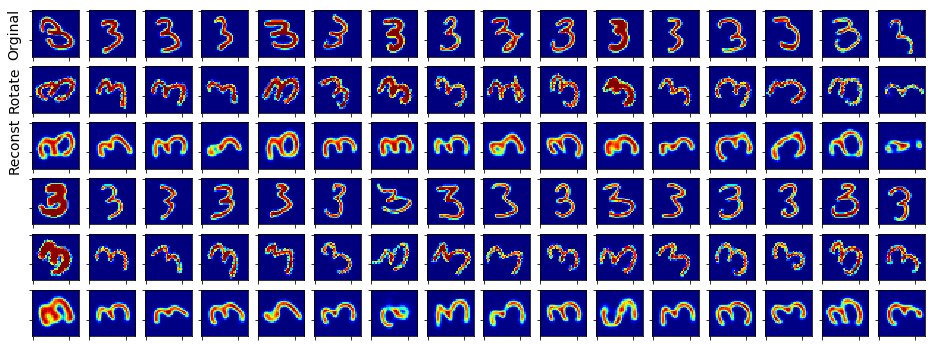

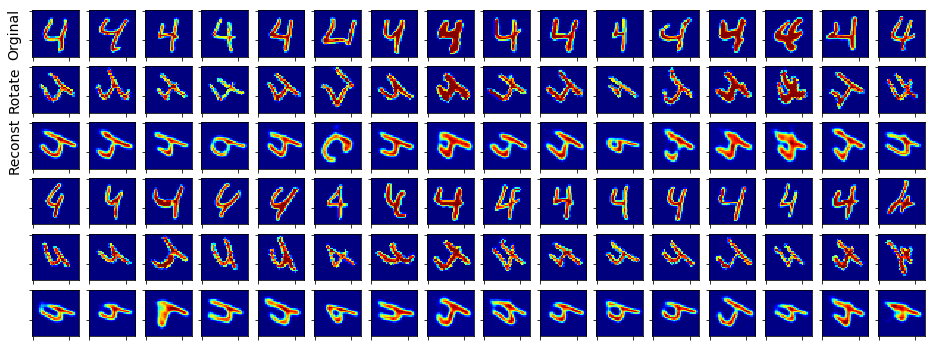

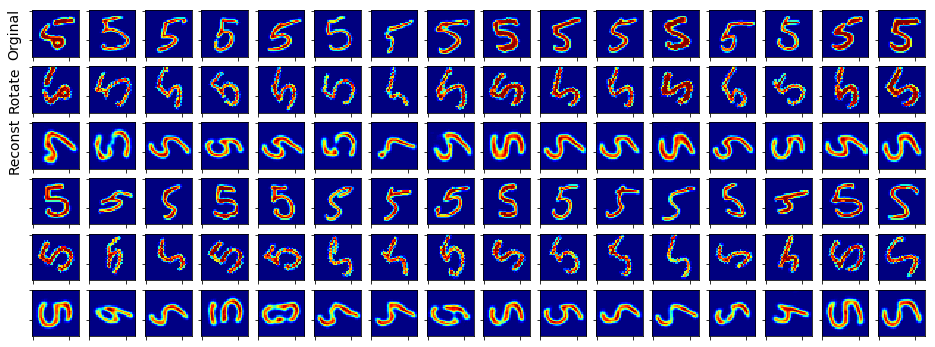

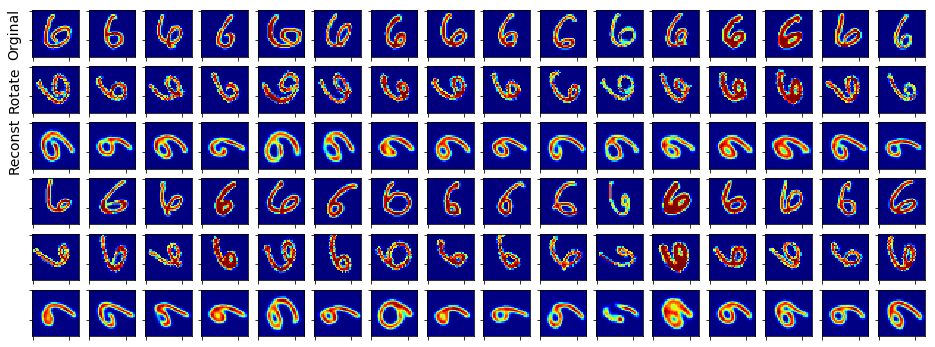

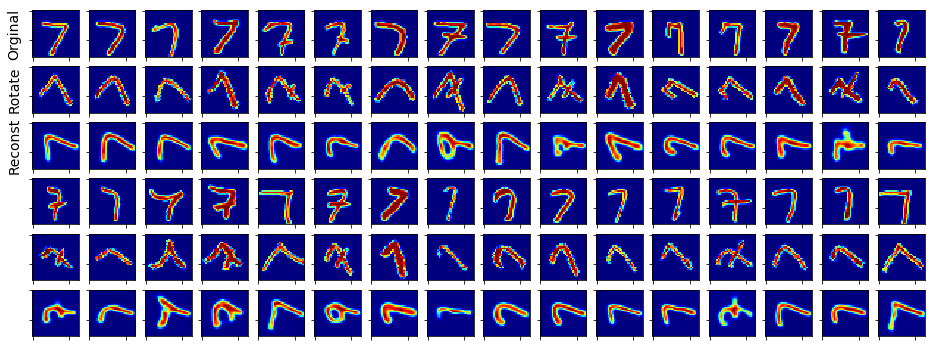

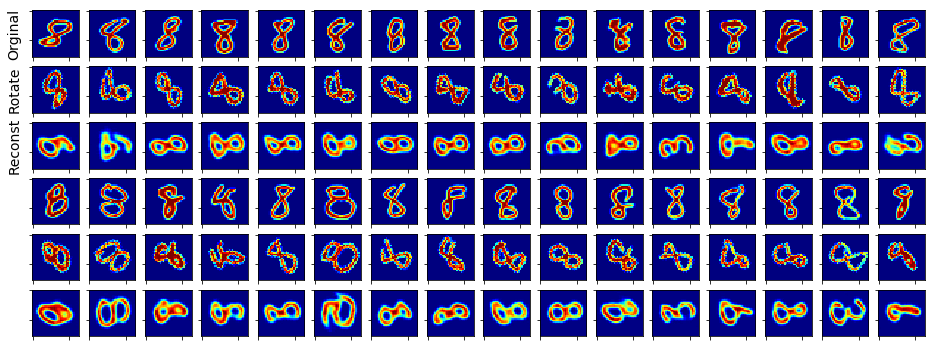

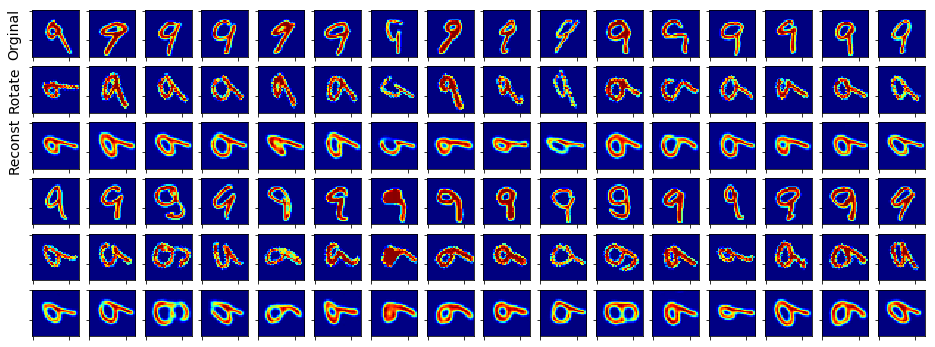

In [65]:
for digit in range(10):
    imgs = test_imgs[np.where(y_test == digit)][:32]
    rimgs_tf = rotate_operation(imgs)
    rtest_imgs = tf.keras.backend.eval(rimgs_tf)
    
    #encoded_imgs = encoder.predict(imgs)   # without rotation
    encoded_imgs = encoder.predict(rtest_imgs)    # with rotation
    results = decoder.predict(encoded_imgs)
        
    height, width = 32,32
    num_test_images = 16
    f,a=plt.subplots(6,num_test_images,figsize=(num_test_images,6))
    for idx, i in enumerate(range(num_test_images)):
        a[0][idx].imshow(np.reshape(imgs[i],(height,width)), cmap='jet')
        a[1][idx].imshow(np.reshape(rtest_imgs[i],(height,width)), cmap='jet')
        a[2][idx].imshow(np.reshape(results[i],(height,width)), cmap='jet')
        a[3][idx].imshow(np.reshape(imgs[i+16],(height,width)), cmap='jet')
        a[4][idx].imshow(np.reshape(rtest_imgs[i+16],(height,width)), cmap='jet')
        a[5][idx].imshow(np.reshape(results[i+16],(height,width)), cmap='jet')
            
        if idx == 0:
            label_list = ['Orginal', 'Rotate', 'Reconst']
            for ii in range(3):
                a[ii][idx].set_ylabel(label_list[ii], fontsize=14)
        
        for ii in range(6):
            # set axis turn off
            a[ii][idx].set_xticklabels([])
            a[ii][idx].set_yticklabels([])
    plt.show()

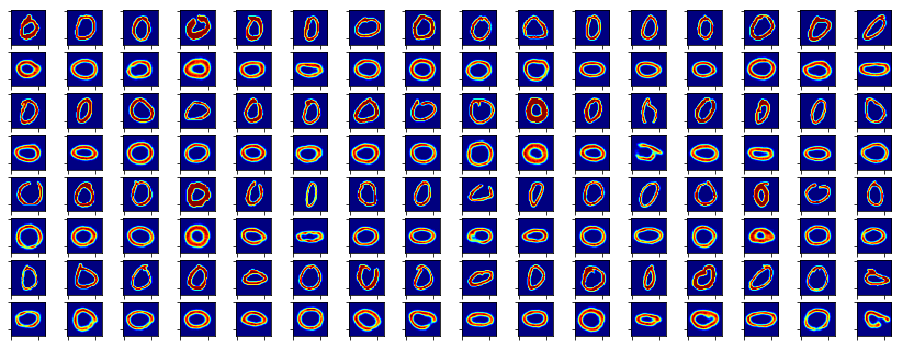

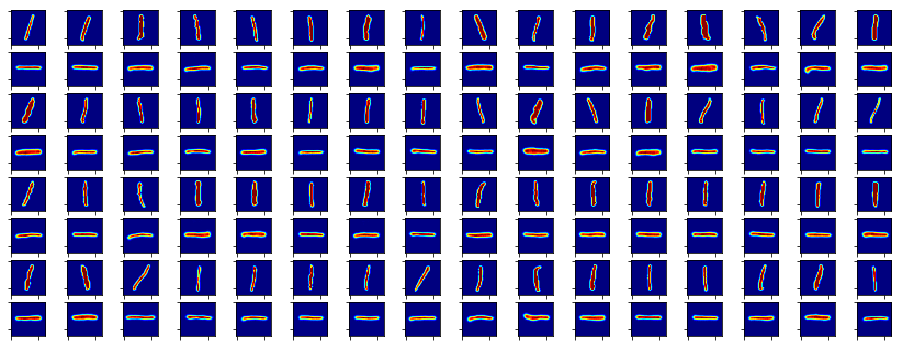

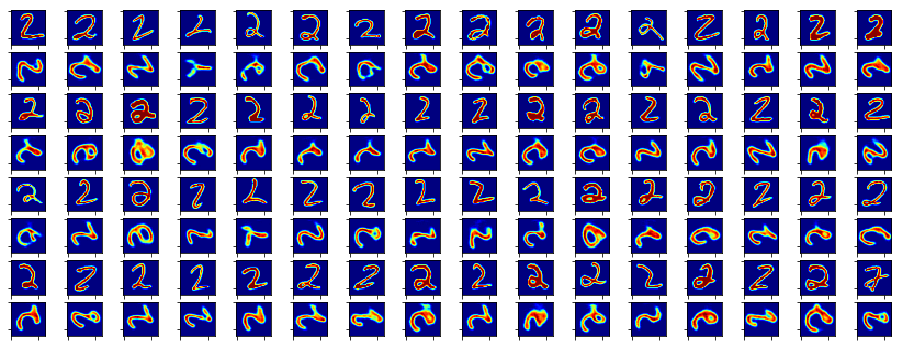

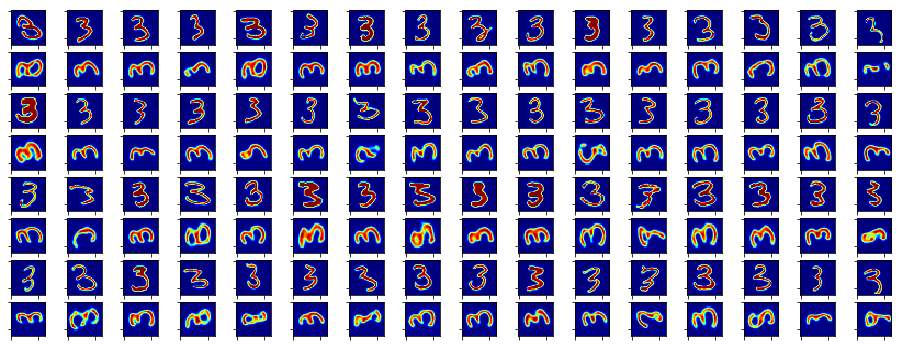

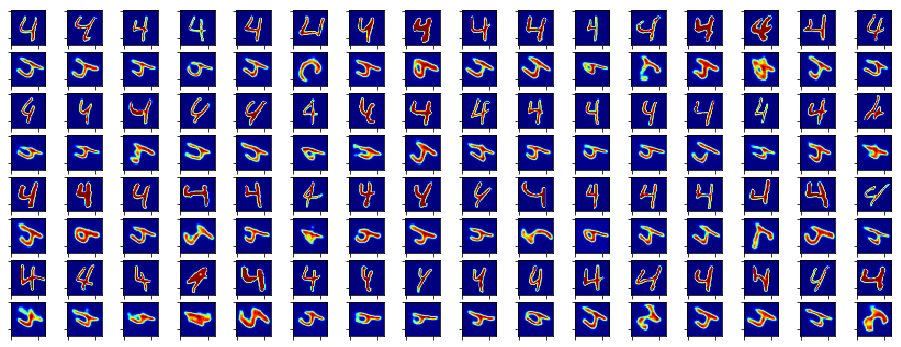

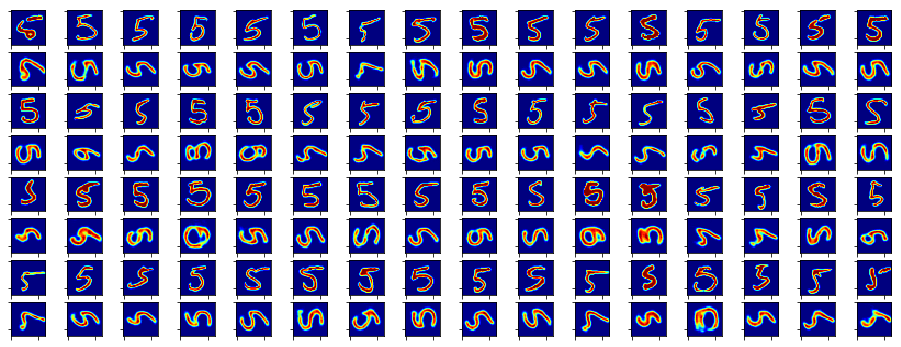

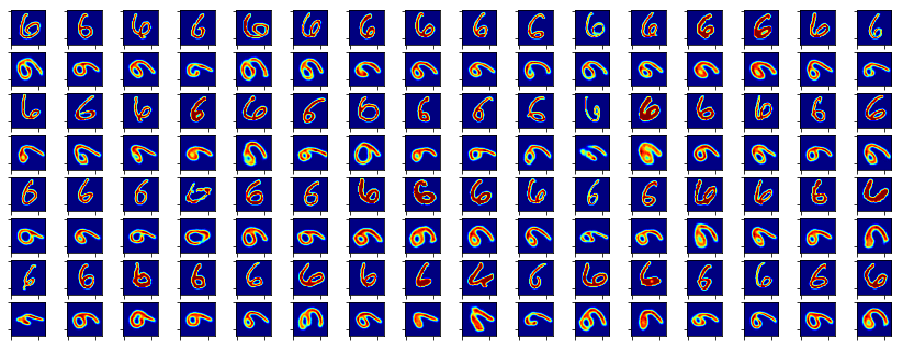

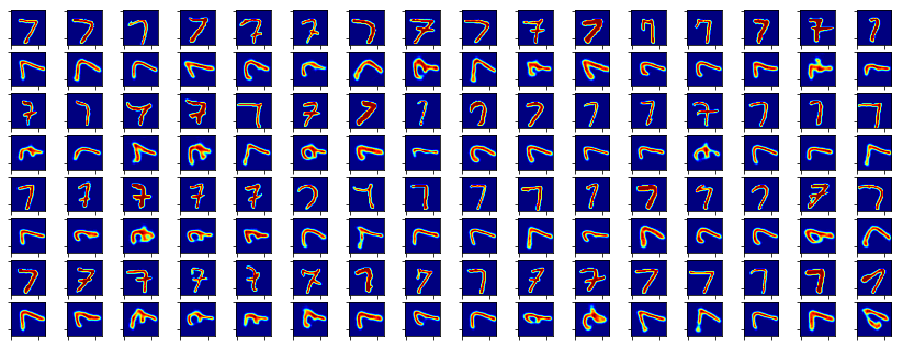

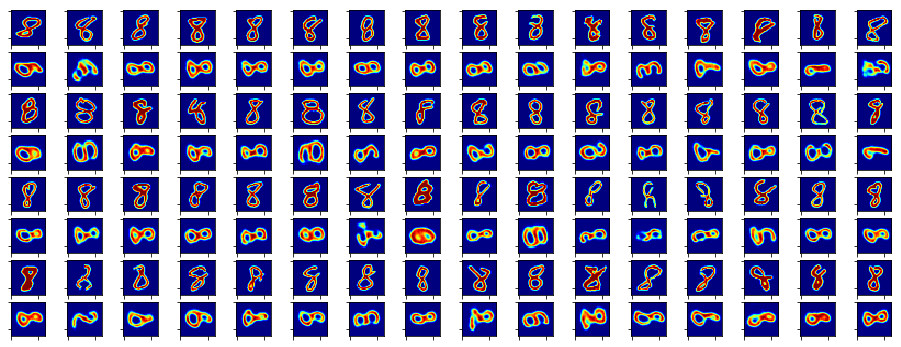

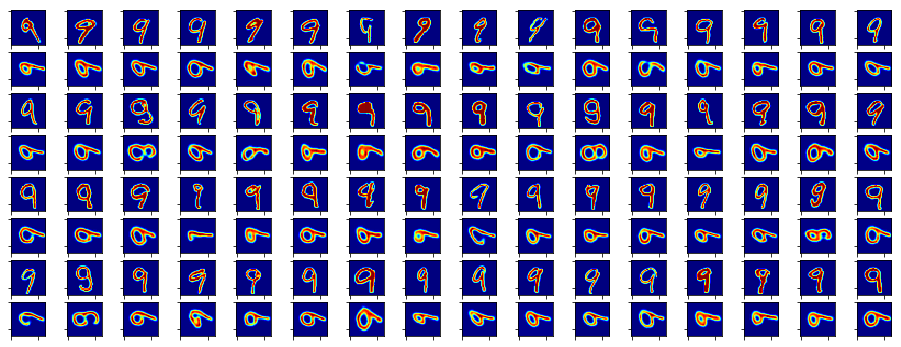

In [57]:
for digit in range(10):
    imgs = test_imgs[np.where(y_test == digit)][:64]
    
    encoded_imgs = encoder.predict(imgs)
    results = decoder.predict(encoded_imgs)
        
    height, width = 32,32
    num_test_images = 16
    f,a=plt.subplots(8,num_test_images,figsize=(2*num_test_images/2,6))
    for idx, i in enumerate(range(num_test_images)):
        a[0][idx].imshow(np.reshape(imgs[i],(height,width)), cmap='jet')
        a[1][idx].imshow(np.reshape(results[i],(height,width)), cmap='jet')
        a[2][idx].imshow(np.reshape(imgs[i+16],(height,width)), cmap='jet')
        a[3][idx].imshow(np.reshape(results[i+16],(height,width)), cmap='jet')
        a[4][idx].imshow(np.reshape(imgs[i+32],(height,width)), cmap='jet')
        a[5][idx].imshow(np.reshape(results[i+32],(height,width)), cmap='jet')
        a[6][idx].imshow(np.reshape(imgs[i+48],(height,width)), cmap='jet')
        a[7][idx].imshow(np.reshape(results[i+48],(height,width)), cmap='jet')
            
        for ii in range(8):
            # set axis turn off
            a[ii][idx].set_xticklabels([])
            a[ii][idx].set_yticklabels([])
    plt.show()

-----------
### Compare:  Rotate loss convergence rates
-   1.0: 62532986, 62532986
-  10.0: 62533003
- 100.0: 62533005(only 1epoch)
- 

In [66]:
name_list = [
    "62532986",
    "62533003",
    "62533005"
]

In [5]:
def get_loss(log_fname):
    # check ltrain-reconst-oss curve
    fname = './log/'+log_fname
    loss_list = []
    with open(fname,'r') as f:
        lines = f.readlines()
        for line in lines:
            tmps = []
            for iline in line.split('\n'):
                for _line in iline.split(','):
                    if len(_line) > 0:
                        tmps.append(float(_line))
            loss_list.append(np.array(tmps))
    
    n = len(loss_list)
    loss_array = np.zeros((n,2))
    loss_array = loss_array.astype(float)
    for idx, i in enumerate(loss_list):
        #print(i, len(i))
        for jdx, j in enumerate(i):
            loss_array[idx, jdx] = j
    return loss_array

In [23]:
loss_list = []
for expname in name_list:
    logname=os.path.basename(glob.glob('./log/loss*'+str(expname)+'*.txt')[0])
    print(os.path.basename(logname))
    loss_array = get_loss(logname)
    loss_list.append(loss_array)

loss_62532986_nepoch-1_lr-0.01_nbatch-32_lambda1.0_dangle11568783707.txt
loss_62533003_nepoch-1_lr-0.01_nbatch-32_lambda10.0_dangle11568784193.txt
loss_62533005_nepoch-1_lr-0.01_nbatch-32_lambda100.0_dangle11568784251.txt


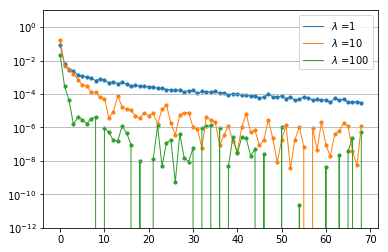

In [36]:
scales = [ str(i) for i in [1,10,100] ]
cs = ["C0", 'C1', "C2"]
for idx, array in enumerate(loss_list):
    x = [ i for i in range(len(array))]
    plt.plot(x,array[:,0], linewidth=1, label=r'$\lambda$ ='+scales[idx], color=cs[idx])
    plt.scatter(x,array[:,0], s=10, color=cs[idx])
    plt.yscale('log')
    plt.gca().yaxis.grid()
    plt.ylim(1.0e-12,10)
plt.legend()
plt.show()

-----------------------
### After modification
$$ take  mean \times (multiply) $$ ==> $$ multiply \times ( take mean) $$

- 0.1: 62535776
- 1.0: 62535778
- 10.0: 62535779
- 100.0: 62536029

In [37]:
name_list = [
    "62535776",
    "62535778",
    "62535779",
    "62536029"
]

In [38]:
loss_list = []
for expname in name_list:
    logname=os.path.basename(glob.glob('./log/loss*'+str(expname)+'*.txt')[0])
    print(os.path.basename(logname))
    loss_array = get_loss(logname)
    loss_list.append(loss_array)

loss_62535776_nepoch-2_lr-0.01_nbatch-32_lambda0.1_dangle11568822356.txt
loss_62535778_nepoch-2_lr-0.01_nbatch-32_lambda1.0_dangle11568822362.txt
loss_62535779_nepoch-2_lr-0.01_nbatch-32_lambda10.0_dangle11568822368.txt
loss_62536029_nepoch-2_lr-0.01_nbatch-32_lambda100.0_dangle11568823535.txt


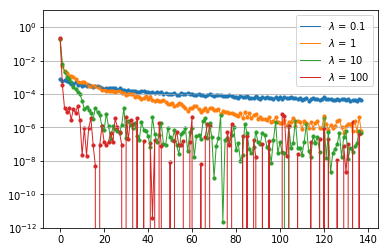

In [42]:
scales = [ str(i) for i in [0.1, 1,10,100] ]
cs = ["C0", 'C1', "C2", "C3"]
for idx, array in enumerate(loss_list):
    x = [ i for i in range(len(array))]
    plt.plot(x,array[:,0], linewidth=1, label=r'$\lambda$ = '+scales[idx], color=cs[idx])
    plt.scatter(x,array[:,0], s=10, color=cs[idx])
    plt.yscale('log')
    plt.gca().yaxis.grid(True)
    plt.ylim(1.0e-12,10)
plt.legend()
plt.show()

-----------------
### Loss Full
- 62536499: lambda = 10.0
- 62522279: lambda = 1.0

In [67]:
name_list = [
    "62522279",
    "62536499",
]

In [68]:
loss_list = []
for expname in name_list:
    logname=os.path.basename(glob.glob('./log/loss*'+str(expname)+'*.txt')[0])
    print(os.path.basename(logname))
    loss_array = get_loss(logname)
    loss_list.append(loss_array)

loss_62522279_nepoch-25_lr-0.01_nbatch-32_lambda1.0_dangle11568750264.txt
loss_62536499_nepoch-25_lr-0.01_nbatch-32_lambda10.0_dangle11568825366.txt


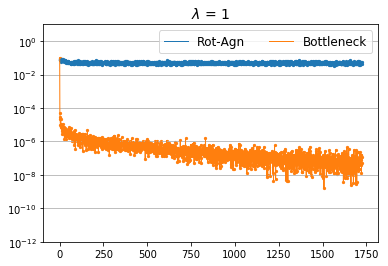

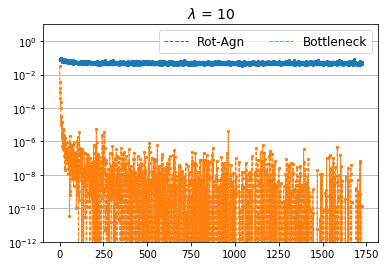

In [80]:
scales = [ str(i) for i in [ 1,10] ]
cs = ["C0", 'C1', "C2", "C3"]
ls = ['-', '--']
names = ['Rot-Agn', 'Bottleneck']
for idx, array in enumerate(loss_list):
    x = [ i for i in range(len(array))]
    for i in range(2):
        plt.plot(x,array[:,i], linewidth=1, linestyle=ls[idx],label=names[i], color=cs[i])
        plt.scatter(x,array[:,i], s=5, color=cs[i])
    plt.yscale('log')
    plt.title(r'$\lambda$ = '+scales[idx],fontsize=14)
    plt.gca().yaxis.grid(True)
    plt.ylim(1.0e-12,10)
    plt.legend(ncol=2, fontsize=12)
    plt.show()

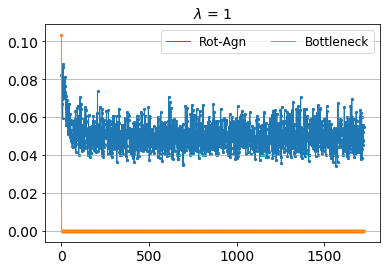

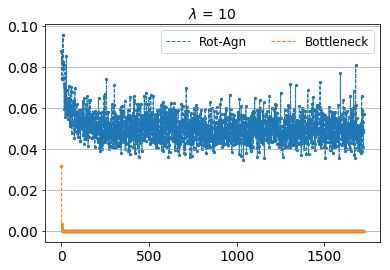

In [114]:
scales = [ str(i) for i in [ 1,10] ]
cs = ["C0", 'C1', "C2", "C3"]
ls = ['-', '--']
names = ['Rot-Agn', 'Bottleneck']
for idx, array in enumerate(loss_list):
    x = [ i for i in range(len(array))]
    for i in range(2):
        plt.plot(x,array[:,i], linewidth=1, linestyle=ls[idx],label=names[i], color=cs[i])
        plt.scatter(x,array[:,i], s=5, color=cs[i])
    #plt.yscale('log')
    plt.title(r'$\lambda$ = '+scales[idx],fontsize=14)
    plt.gca().yaxis.grid(True)
    #plt.ylim(1.0e-12,10)
    plt.legend(ncol=2, fontsize=12)
    plt.show()

- Only second term

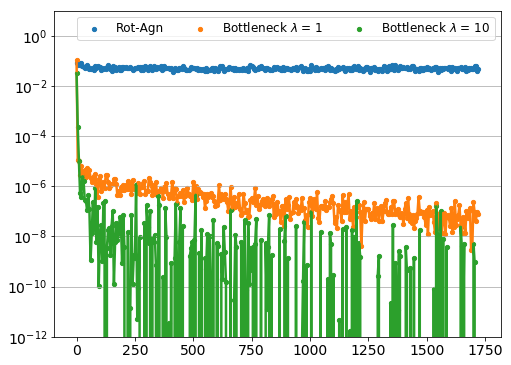

In [105]:
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 14
scales = [ str(i) for i in [ 1,10] ]
cs = ['C1', "C2", "C3"]

# one line for rot-agn 
x = np.array([ i for i in range(0,len(loss_list[0]),5)])
plt.plot(x,loss_list[0][x,0], linewidth=2.5, color='C0')
plt.scatter(x,loss_list[0][x,0], s=18, label='Rot-Agn',color='C0')
for idx, array in enumerate(loss_list):
    x = np.array([ i for i in range(0,len(array),5)])
    plt.plot(x,array[x,1], linewidth=2.5, color=cs[idx])
    plt.scatter(x,array[x,1], s=18, label=r'Bottleneck $\lambda$ = '+scales[idx],color=cs[idx])
plt.yscale('log')
#plt.title(,fontsize=14)
plt.gca().yaxis.grid(True)
plt.ylim(1.0e-12,10)
plt.legend(ncol=3, fontsize=12)
plt.show()

- Load 62516846(Only rot-agn)

In [106]:
expname = "62516846"
logname=os.path.basename(glob.glob('./log/loss*'+expname+'*.txt')[0])
print(os.path.basename(logname))
loss_base = get_loss(logname)

loss_62516846_nepoch-25_lr-0.01_nbatch-32_lambda1.0_dangle11568736874.txt


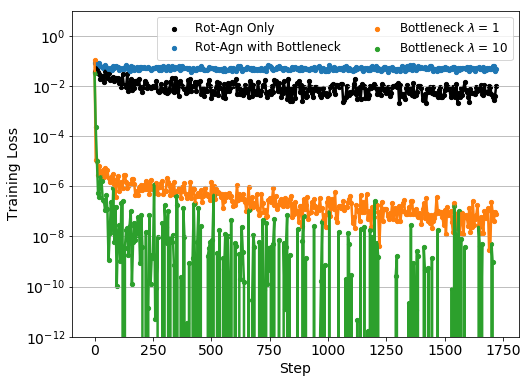

In [112]:
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 14
scales = [ str(i) for i in [ 1,10] ]
cs = ['C1', "C2", "C3"]

# one line for only rot-agn 
x = np.array([ i for i in range(0,len(loss_base),5)])
plt.plot(x,loss_base[x,0], linewidth=2.5, color='black')
plt.scatter(x,loss_base[x,0], s=18, label='Rot-Agn Only',color='black')

# one line for rot-agn 
x = np.array([ i for i in range(0,len(loss_list[0]),5)])
plt.plot(x,loss_list[0][x,0], linewidth=2.5, color='C0')
plt.scatter(x,loss_list[0][x,0], s=18, label='Rot-Agn with Bottleneck',color='C0')


for idx, array in enumerate(loss_list):
    x = np.array([ i for i in range(0,len(array),5)])
    plt.plot(x,array[x,1], linewidth=2.5, color=cs[idx])
    plt.scatter(x,array[x,1], s=18, label=r'Bottleneck $\lambda$ = '+scales[idx],color=cs[idx])

plt.yscale('log')
#plt.title(,fontsize=14)
plt.gca().yaxis.grid(True)
plt.ylim(1.0e-12,10)
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.legend(ncol=2, fontsize=12)
plt.show()

---------------------------
### 62538901 Lambda = 0.1 epoch 0-25 (restart from 25 epoch is 62540480 )

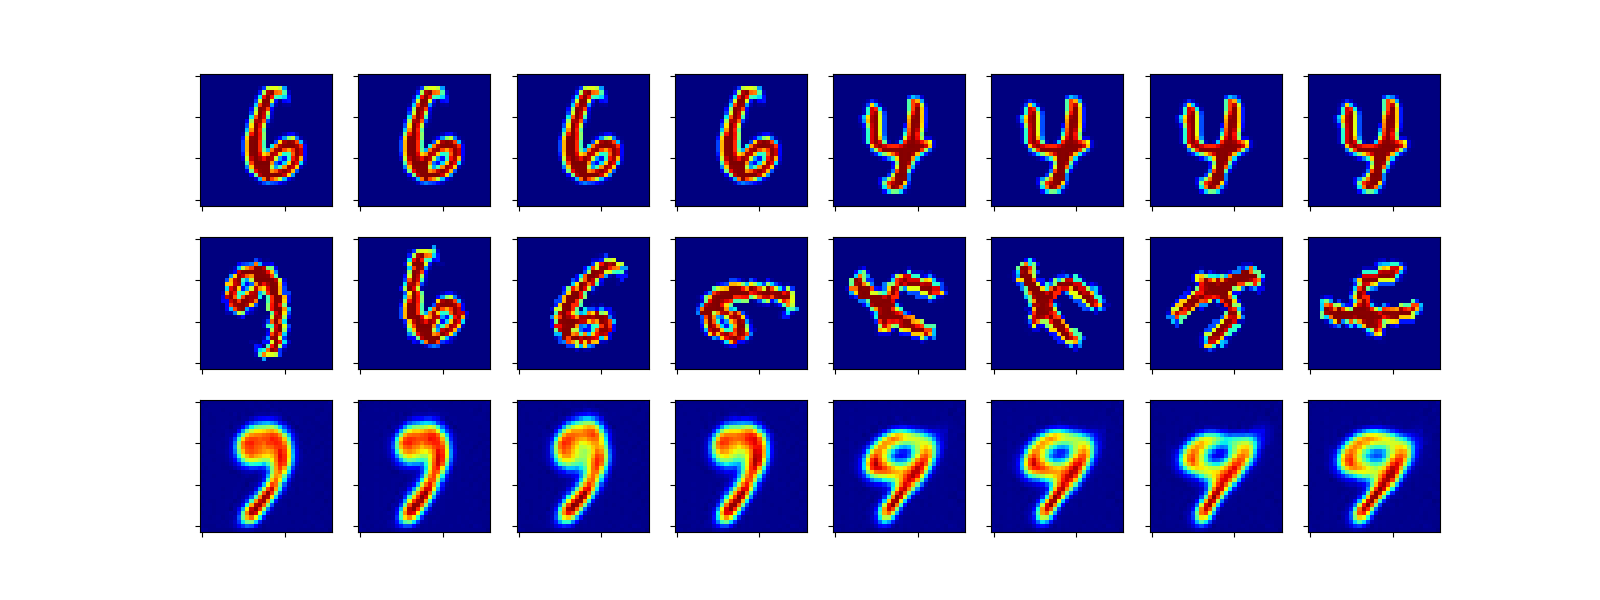

In [115]:
expname = '62538901'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [116]:
logname=os.path.basename(glob.glob('./log/loss*'+expname+'*.txt')[0])
print(os.path.basename(logname))
loss_array = get_loss(logname)

loss_62538901_nepoch-25_lr-0.01_nbatch-32_lambda0.1_dangle11568838221.txt


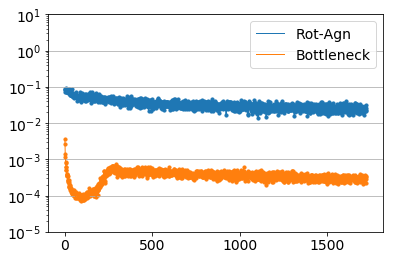

In [125]:
names = ['Rot-Agn', 'Bottleneck']
cs = ["C0", 'C1', "C2"]
for i in range(2):
    x = [ i for i in range(len(loss_array))]
    plt.plot(x,loss_array[:,i], linewidth=1, label=names[i], color=cs[i])
    plt.scatter(x,loss_array[:,i], s=10, color=cs[i])
    plt.yscale('log')
    plt.gca().yaxis.grid(True)
    plt.ylim(1.0e-5,10)
plt.legend()
plt.show()

------------
### 62540480: Train mode 25 epoch above model

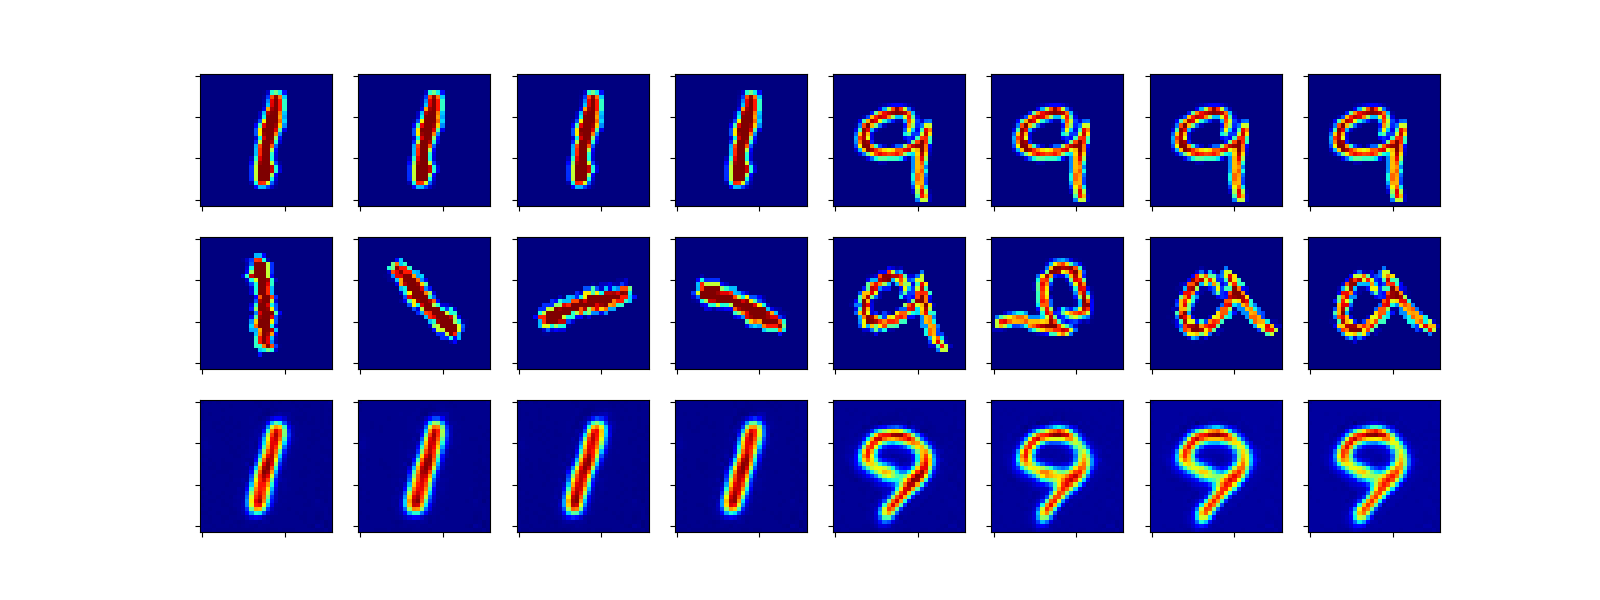

In [2]:
expname = '62540480'
display_png(Image(glob.glob('./fig/*'+expname+'*.png')[0]))

In [6]:
expname = '62540480'
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=24, mtype='encoder')
decoder = load_model(model_dir, epoch=24, mtype='decoder')

 Load encoder at 24 epoch
 Load decoder at 24 epoch


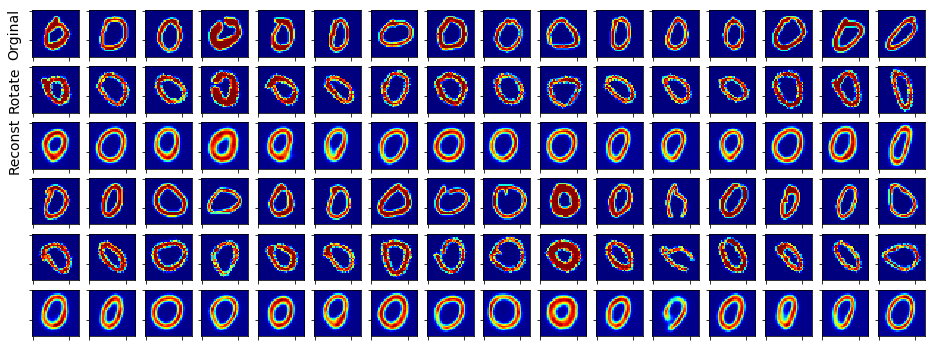

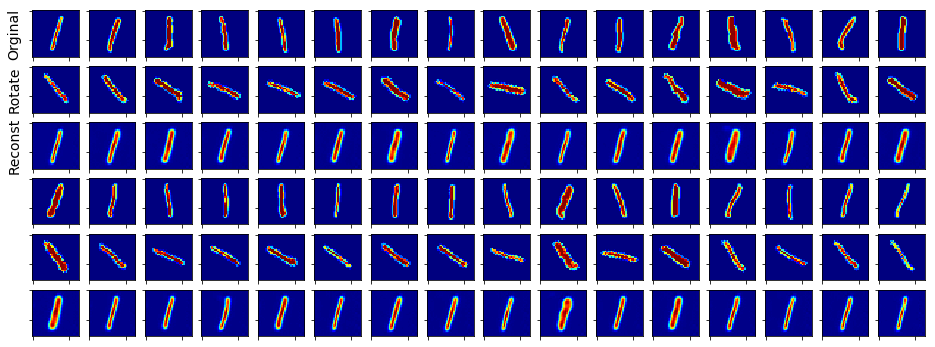

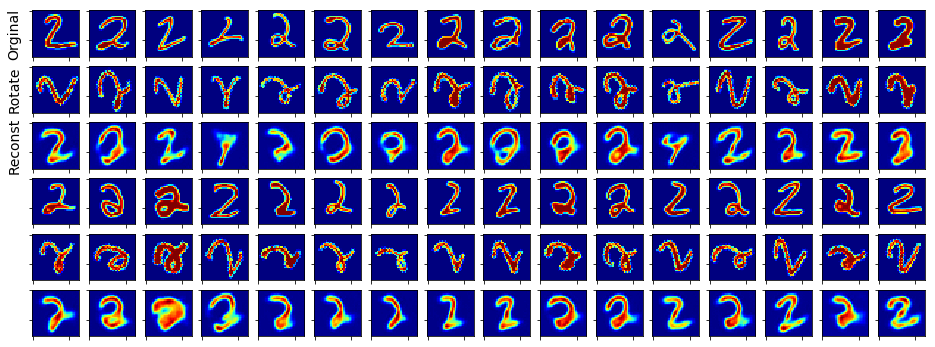

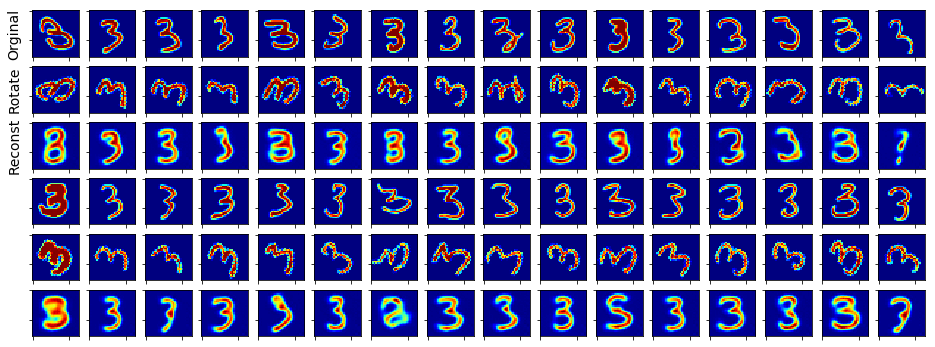

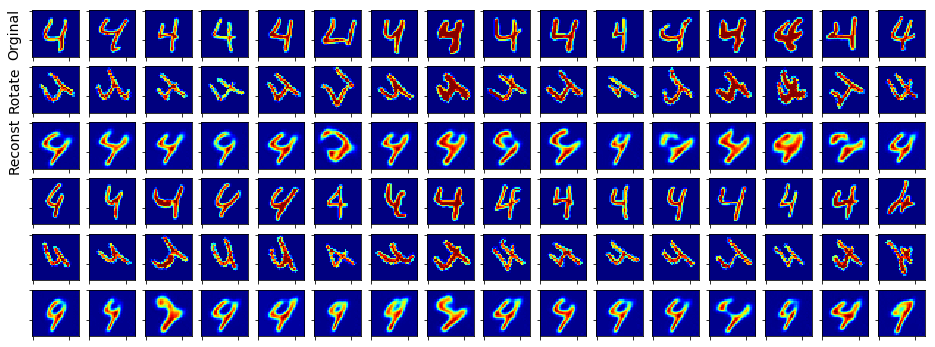

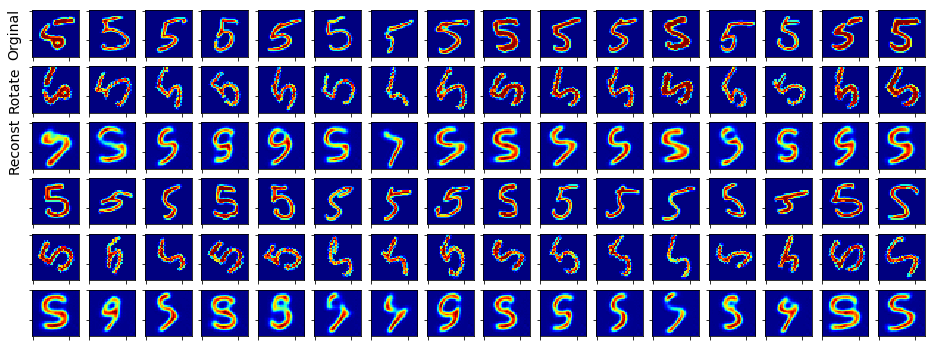

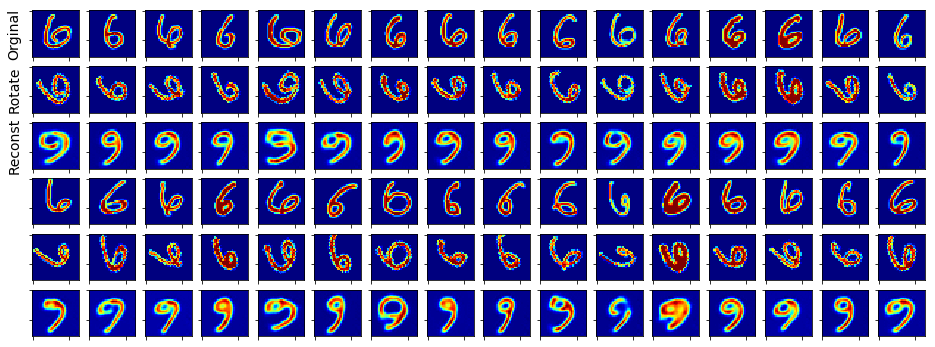

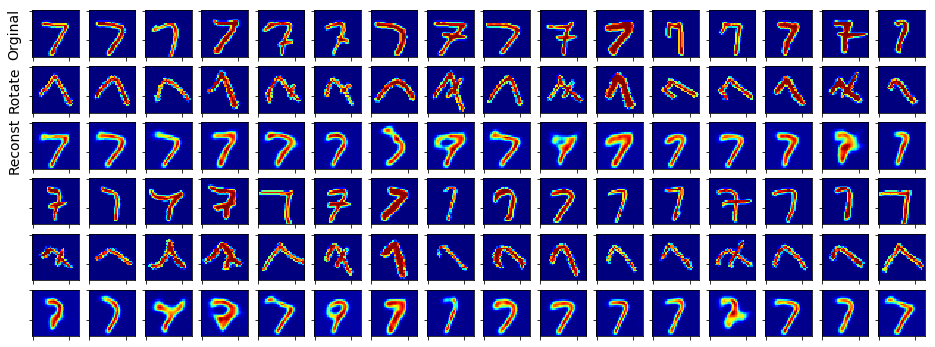

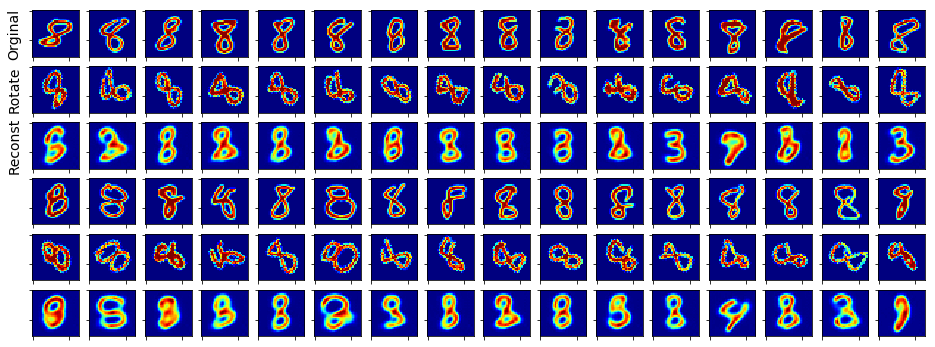

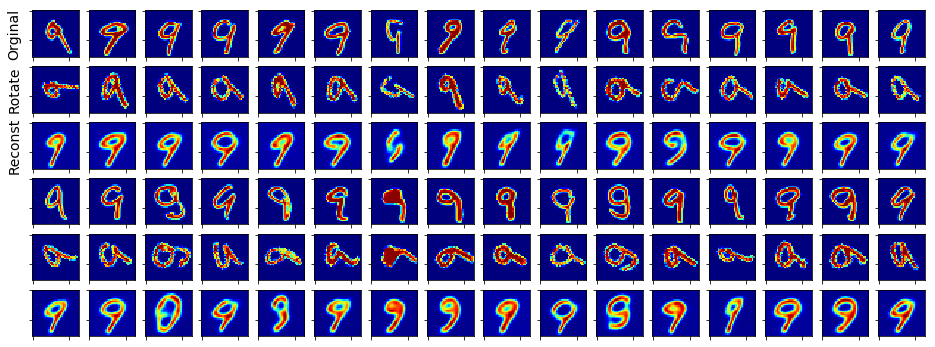

In [7]:
for digit in range(10):
    imgs = test_imgs[np.where(y_test == digit)][:32]
    rimgs_tf = rotate_operation(imgs)
    rtest_imgs = tf.keras.backend.eval(rimgs_tf)
    
    #encoded_imgs = encoder.predict(imgs)   # without rotation
    encoded_imgs = encoder.predict(rtest_imgs)    # with rotation
    results = decoder.predict(encoded_imgs)
        
    height, width = 32,32
    num_test_images = 16
    f,a=plt.subplots(6,num_test_images,figsize=(num_test_images,6))
    for idx, i in enumerate(range(num_test_images)):
        a[0][idx].imshow(np.reshape(imgs[i],(height,width)), cmap='jet')
        a[1][idx].imshow(np.reshape(rtest_imgs[i],(height,width)), cmap='jet')
        a[2][idx].imshow(np.reshape(results[i],(height,width)), cmap='jet')
        a[3][idx].imshow(np.reshape(imgs[i+16],(height,width)), cmap='jet')
        a[4][idx].imshow(np.reshape(rtest_imgs[i+16],(height,width)), cmap='jet')
        a[5][idx].imshow(np.reshape(results[i+16],(height,width)), cmap='jet')
            
        if idx == 0:
            label_list = ['Orginal', 'Rotate', 'Reconst']
            for ii in range(3):
                a[ii][idx].set_ylabel(label_list[ii], fontsize=14)
        
        for ii in range(6):
            # set axis turn off
            a[ii][idx].set_xticklabels([])
            a[ii][idx].set_yticklabels([])
    plt.show()